<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Single-variate-with-length-1" data-toc-modified-id="Single-variate-with-length-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single variate with length 1</a></span></li><li><span><a href="#Multivariate" data-toc-modified-id="Multivariate-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Multivariate</a></span></li><li><span><a href="#Multivariate-forecasting-with-function" data-toc-modified-id="Multivariate-forecasting-with-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Multivariate forecasting with function</a></span></li><li><span><a href="#Full-multivatiate-prediction-with-self-and-forecasting" data-toc-modified-id="Full-multivatiate-prediction-with-self-and-forecasting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Full multivatiate prediction with self and forecasting</a></span></li><li><span><a href="#Predicting-stock-data" data-toc-modified-id="Predicting-stock-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Predicting stock data</a></span></li><li><span><a href="#Predicting-one-stock-with-it's-own-performance-and-analyst" data-toc-modified-id="Predicting-one-stock-with-it's-own-performance-and-analyst-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predicting one stock with it's own performance and analyst</a></span></li><li><span><a href="#Predicting-stocks-by-industry" data-toc-modified-id="Predicting-stocks-by-industry-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting stocks by industry</a></span></li><li><span><a href="#Multi-day" data-toc-modified-id="Multi-day-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Multi day</a></span></li><li><span><a href="#Completely-variable-TS-prediction-and-forecasting" data-toc-modified-id="Completely-variable-TS-prediction-and-forecasting-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Completely variable TS prediction and forecasting</a></span></li><li><span><a href="#Predicting-with-performance-columns" data-toc-modified-id="Predicting-with-performance-columns-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Predicting with performance columns</a></span></li><li><span><a href="#Correlation-check" data-toc-modified-id="Correlation-check-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Correlation check</a></span><ul class="toc-item"><li><span><a href="#Test-correlation-check-by-differencing-price" data-toc-modified-id="Test-correlation-check-by-differencing-price-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Test correlation check by differencing price</a></span><ul class="toc-item"><li><span><a href="#Make-a-dataframe-with-the-correlations" data-toc-modified-id="Make-a-dataframe-with-the-correlations-11.1.1"><span class="toc-item-num">11.1.1&nbsp;&nbsp;</span>Make a dataframe with the correlations</a></span></li></ul></li></ul></li><li><span><a href="#Find-price-correlation" data-toc-modified-id="Find-price-correlation-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Find price correlation</a></span><ul class="toc-item"><li><span><a href="#Difference-correlation-to-price-2-days-ahead" data-toc-modified-id="Difference-correlation-to-price-2-days-ahead-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>Difference correlation to price 2 days ahead</a></span></li><li><span><a href="#Let's-look-at-one-day-difference-of-the-columns-we-are-dropping-vs-not-dropping" data-toc-modified-id="Let's-look-at-one-day-difference-of-the-columns-we-are-dropping-vs-not-dropping-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Let's look at one day difference of the columns we are dropping vs not dropping</a></span></li></ul></li><li><span><a href="#Model-single-stock-without-the-columns-we-are-dropping." data-toc-modified-id="Model-single-stock-without-the-columns-we-are-dropping.-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Model single stock without the columns we are dropping.</a></span></li></ul></div>

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [2]:
## Single variate with length 2

In [3]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
b = np.array([1, 2, 3, 4])

ts = TimeseriesGenerator(a, b, 3)


In [4]:
ts.data

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [5]:
ts.targets

array([1, 2, 3, 4])

In [6]:
try:
    del model
except NameError:
    pass

model = Sequential()
model.add(LSTM(3, activation='relu', input_shape=(1, 3)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 0s/step - loss: 15.9044
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 15.8736
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 15.8426
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 15.8111
Epoch 5/100
1/1 [==============================] - 0s 999us/step - loss: 15.7794
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 15.7473
Epoch 7/100
1/1 [==============================] - 0s 1ms/step - loss: 15.7147
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 15.6818
Epoch 9/100
1/1 [==============================] - 0s 1000us/step - loss: 15.6484
Epoch 10/100
1/1 [==============================] - 0s 1ms/step - loss: 15.6146
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 15.5802
Epoch 12/100
1/1 [==============================] - 0s 1ms/step - loss: 15.5454
Epoch 13/100
1/1 [===========================

In [7]:
pred = []
for i in range(len(ts.data)):
    print(ts.data[i], ts.targets[i])
    pred.append(model.predict(ts.data[i].reshape(1, 1, 3)))
pred

[1 2 3] 1
[4 5 6] 2
[7 8 9] 3
[10 11 12] 4


[array([[0.6292587]], dtype=float32),
 array([[1.5746479]], dtype=float32),
 array([[2.783317]], dtype=float32),
 array([[4.170993]], dtype=float32)]

In [8]:
model.predict(np.array([7, 8, 9]).reshape(1, 1, 3))

array([[2.783317]], dtype=float32)

In [9]:
model.predict(ts.data[0].reshape(1, 1, 3))

array([[0.6292587]], dtype=float32)

## Single variate with length 1

In [10]:
a = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])
b = np.array([1, 2, 3])

ts = TimeseriesGenerator(a, b, 1)

In [11]:
ts.data

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [12]:
ts.targets

array([1, 2, 3])

In [13]:
try:
    del model
except NameError:
    pass

model = Sequential()
          # 3 is n_days,  n_days of shape 3 :)  if n_days ( length of generator was 1, LSTM would take 1)
model.add(LSTM(9, activation='relu', input_shape=(1, 4)))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 1ms/step - loss: 1.6983
Epoch 2/100
1/1 [==============================] - 0s 1ms/step - loss: 1.6277
Epoch 3/100
1/1 [==============================] - 0s 1ms/step - loss: 1.5592
Epoch 4/100
1/1 [==============================] - 0s 1ms/step - loss: 1.4928
Epoch 5/100
1/1 [==============================] - 0s 1000us/step - loss: 1.4286
Epoch 6/100
1/1 [==============================] - 0s 1ms/step - loss: 1.3665
Epoch 7/100
1/1 [==============================] - 0s 999us/step - loss: 1.3067
Epoch 8/100
1/1 [==============================] - 0s 1ms/step - loss: 1.2491
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 1.1941
Epoch 10/100
1/1 [==============================] - 0s 1000us/step - loss: 1.1414
Epoch 11/100
1/1 [==============================] - 0s 1ms/step - loss: 1.0910
Epoch 12/100
1/1 [==============================] - 0s 0s/step - loss: 1.0428
Epoch 13/100
1/1 [==============================] - 0s

In [14]:
pred = []
for i in range(len(ts.data)):
    print(ts.data[i], ts.targets[i])
    pred.append(model.predict(ts.data[i].reshape(1, 1, 4)))
pred

[1 2 3 4] 1
[5 6 7 8] 2
[ 9 10 11 12] 3


[array([[1.1936994]], dtype=float32),
 array([[3.279215]], dtype=float32),
 array([[5.170732]], dtype=float32)]

## Multivariate

In [59]:
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])
b = np.array([[1, 1],
              [4, 8],
              [13, 17],
              [22, 26]])

ts = TimeseriesGenerator(a, b, length=1)

print("ts length", len(ts.data))
for i in range(len(ts.data)):
    print(ts.data[i], ts.targets[i])
ts.data, ts.targets, 


ts length 4
[1 2 3] [1 1]
[4 5 6] [4 8]
[7 8 9] [13 17]
[10 11 12] [22 26]


(array([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]]),
 array([[ 1,  1],
        [ 4,  8],
        [13, 17],
        [22, 26]]))

In [60]:
len(ts)

1

In [61]:
ts.start_index

1

In [62]:
ts.end_index

3

In [2]:
from keras import backend as K

Using TensorFlow backend.


In [64]:
try:
    del model
    K.clear_session()
    prine('deleted')
except NameError:
    pass

model = Sequential()
          # 3 is n_days,  n_days of shape 3 :)  if n_days ( length of generator was 1, LSTM would take 1)
model.add(LSTM(64, activation='relu', input_shape=(1, 3)))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse')
model.fit(ts, epochs=700)

 loss: 0.0603
Epoch 454/700
1/1 [==============================] - 0s 997us/step - loss: 0.0600
Epoch 455/700
1/1 [==============================] - 0s 995us/step - loss: 0.0589
Epoch 456/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0598
Epoch 457/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0593
Epoch 458/700
1/1 [==============================] - 0s 999us/step - loss: 0.0613
Epoch 459/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0617
Epoch 460/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0635
Epoch 461/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0622
Epoch 462/700
1/1 [==============================] - 0s 2ms/step - loss: 0.0629
Epoch 463/700
1/1 [==============================] - 0s 999us/step - loss: 0.0603
Epoch 464/700
1/1 [==============================] - 0s 1ms/step - loss: 0.0616
Epoch 465/700
1/1 [==============================] - 0s 997us/step - loss: 0.0598
Epoch 466/700
1/

In [65]:
for i in range(len(ts.data)):
    print("\n\nrun", i)
    print("\tINFORMATION")
    print("  data       targets    len(ts)")
    print(ts.data[i], "     ", ts.targets[i], "      ", len(ts))
    print("predict(ts)\n", model.predict(ts))



run 0
	INFORMATION
  data       targets    len(ts)
[1 2 3]       [1 1]        1
predict(ts)
 [[ 4.063836  8.070781]
 [13.16628  17.187021]
 [22.254719 26.289022]]


run 1
	INFORMATION
  data       targets    len(ts)
[4 5 6]       [4 8]        1
predict(ts)
 [[ 4.063836  8.070781]
 [13.16628  17.187021]
 [22.254719 26.289022]]


run 2
	INFORMATION
  data       targets    len(ts)
[7 8 9]       [13 17]        1
predict(ts)
 [[ 4.063836  8.070781]
 [13.16628  17.187021]
 [22.254719 26.289022]]


run 3
	INFORMATION
  data       targets    len(ts)
[10 11 12]       [22 26]        1
predict(ts)
 [[ 4.063836  8.070781]
 [13.16628  17.187021]
 [22.254719 26.289022]]


In [66]:
for i in range(len(ts.data)):
    print("\tINFORMATION")
    print("  data       targets    len(ts)   reshaped data")
    try:
        print(ts.data[i], "     ", ts.targets[i+1], "      ", len(ts), "    ", ts.data[i].reshape(1, 1, 3))
    except IndexError:
        print("END")
        print("  data      len(ts)  reshaped data")
        print(ts.data[i], "   ", len(ts), "   ", ts.data[i].reshape(1, 1, 3))
    print("PREDICTION:", model.predict(ts.data[i].reshape(1, 1, 3)), '\n')

	INFORMATION
  data       targets    len(ts)   reshaped data
[1 2 3]       [4 8]        1      [[[1 2 3]]]
PREDICTION: [[4.0638356 8.070781 ]] 

	INFORMATION
  data       targets    len(ts)   reshaped data
[4 5 6]       [13 17]        1      [[[4 5 6]]]
PREDICTION: [[13.16628  17.187021]] 

	INFORMATION
  data       targets    len(ts)   reshaped data
[7 8 9]       [22 26]        1      [[[7 8 9]]]
PREDICTION: [[22.254719 26.289022]] 

	INFORMATION
  data       targets    len(ts)   reshaped data
END
  data      len(ts)  reshaped data
[10 11 12]     1     [[[10 11 12]]]
PREDICTION: [[31.305786 35.516647]] 



## Multivariate forecasting with function

In [86]:
test = []
for i in range(1, 30, 3):
    test.append([i, i+1, i+2])

X = test

y = []
for x in test:
    y.append([(x[0]*2+x[1]), (x[2]*2+x[1])])

In [87]:
import pandas as pd

In [88]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)


In [89]:
columns = ["f_1", "f_2", "f_3", "t_1", "t_2"]
test_df = pd.concat([X_df, y_df.shift(1)], axis=1)
test_df.columns=columns
test_df

f_1  f_2  f_3   t_1   t_2
0    1    2    3   NaN   NaN
1    4    5    6   4.0   8.0
2    7    8    9  13.0  17.0
3   10   11   12  22.0  26.0
4   13   14   15  31.0  35.0
5   16   17   18  40.0  44.0
6   19   20   21  49.0  53.0
7   22   23   24  58.0  62.0
8   25   26   27  67.0  71.0
9   28   29   30  76.0  80.0

In [90]:
X = test_df[[col for col in test_df.columns if 'f' in col]].values
y = test_df[[col for col in test_df.columns if 't' in col]].values
display(X, y)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24],
       [25, 26, 27],
       [28, 29, 30]], dtype=int64)

array([[nan, nan],
       [ 4.,  8.],
       [13., 17.],
       [22., 26.],
       [31., 35.],
       [40., 44.],
       [49., 53.],
       [58., 62.],
       [67., 71.],
       [76., 80.]])

In [91]:
ts = TimeseriesGenerator(X, y, 1)

In [93]:
ts.data

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15],
       [16, 17, 18],
       [19, 20, 21],
       [22, 23, 24],
       [25, 26, 27],
       [28, 29, 30]], dtype=int64)

In [92]:
ts.targets

array([[nan, nan],
       [ 4.,  8.],
       [13., 17.],
       [22., 26.],
       [31., 35.],
       [40., 44.],
       [49., 53.],
       [58., 62.],
       [67., 71.],
       [76., 80.]])

In [73]:
try:
    del model
    K.clear_session()
    prine('deleted')
except NameError:
    pass

model = Sequential()
          # 3 is n_days,  n_days of shape 3 :)  if n_days ( length of generator was 1, LSTM would take 1)
model.add(LSTM(64, activation='relu', input_shape=(1, 3)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=700)

======================] - 0s 998us/step - loss: 0.4716
Epoch 454/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4683
Epoch 455/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4651
Epoch 456/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4619
Epoch 457/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4587
Epoch 458/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4556
Epoch 459/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4525
Epoch 460/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4494
Epoch 461/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4463
Epoch 462/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4433
Epoch 463/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4403
Epoch 464/700
1/1 [==============================] - 0s 1ms/step - loss: 0.4373
Epoch 465/700
1/1 [==============================] - 0s 998us/ste

In [4]:
from sklearn.metrics import r2_score

In [75]:
r2_score(model.predict(ts), ts.targets[1:])

0.9997769330128002

In [76]:
test_ts = ts.data.copy()
for x in test_ts:
    pred = model.predict(x.reshape(1, 1, 3))
    print(pred)

[[4.7668295 7.2232203]]
[[12.593334 16.569921]]
[[21.557735 26.0183  ]]
[[30.834322 35.212868]]
[[40.100044 44.247456]]
[[49.241844 53.20179 ]]
[[58.2277  62.09856]]
[[67.06223  70.940254]]
[[75.76655 79.72993]]
[[84.36669 88.47526]]


## Full multivatiate prediction with self and forecasting
> We're going to predict the next y_col with the previous y_col

In [77]:
y_df

0   1
0   4   8
1  13  17
2  22  26
3  31  35
4  40  44
5  49  53
6  58  62
7  67  71
8  76  80
9  85  89

In [142]:
ts = TimeseriesGenerator(y_df.values, y_df.values, length=1, batch_size=1)

In [5]:
from tensorflow.keras.layers import GaussianNoise

In [150]:
try:
    del model
    K.clear_session()
    prine('deleted')
except NameError:
    pass

model = Sequential()
optimizers = ['ftrl', 'rmsprop', 'adamax', 'adam']
model.add(LSTM(90, activation='relu', input_shape=(1, 2)))
model.add(GaussianNoise(1))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=2000)

==] - 0s 1ms/step - loss: 2.9508
Epoch 1760/2000
1/1 [==============================] - 0s 1000us/step - loss: 7.0095
Epoch 1761/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.7069
Epoch 1762/2000
1/1 [==============================] - 0s 998us/step - loss: 2.5278
Epoch 1763/2000
1/1 [==============================] - 0s 1ms/step - loss: 4.0602
Epoch 1764/2000
1/1 [==============================] - 0s 1ms/step - loss: 3.9006
Epoch 1765/2000
1/1 [==============================] - 0s 1ms/step - loss: 1.5497
Epoch 1766/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.8085
Epoch 1767/2000
1/1 [==============================] - 0s 1ms/step - loss: 0.8851
Epoch 1768/2000
1/1 [==============================] - 0s 998us/step - loss: 1.3432
Epoch 1769/2000
1/1 [==============================] - 0s 0s/step - loss: 1.0575
Epoch 1770/2000
1/1 [==============================] - 0s 2ms/step - loss: 1.7577
Epoch 1771/2000
1/1 [==============================] - 0s 1

In [151]:
test_ts = ts.data.copy()
for x in test_ts:
    pred = model.predict(x.reshape(1, 1, 2))
    print(pred)

[[ 9.432992 11.491437]]
[[19.958511 22.828909]]
[[30.32767  33.580734]]
[[40.23759  43.550037]]
[[49.779354 53.043015]]
[[59.163593 62.414307]]
[[68.38186 71.8311 ]]
[[77.60636 81.28817]]
[[86.74637  90.656425]]
[[95.82438 99.95101]]


In [152]:
y_df

0   1
0   4   8
1  13  17
2  22  26
3  31  35
4  40  44
5  49  53
6  58  62
7  67  71
8  76  80
9  85  89

In [153]:
test = []
for i in range(1, 500, 3):
    test.append([i, i+1, i+2])

X = test

y = []
for x in test:
    y.append([(x[0]*2+x[1]), (x[2]*2+x[1])])

In [154]:
y_df = pd.DataFrame(y)
y_df.tail()

0     1
162  1462  1466
163  1471  1475
164  1480  1484
165  1489  1493
166  1498  1502

In [155]:
test_ts = list(ts.data.copy())
z = 0
for x in test_ts:
    z += 1
    if z == 166:
        break
    pred = model.predict(x.reshape(1, 1, 2))
    test_ts.append(pred.reshape(2))

In [156]:
prediction_df = pd.DataFrame(test_ts)

In [157]:
prediction_df.tail()

0           1
170  166.188828  171.631790
171  191.631882  197.652328
172  211.014908  217.553223
173  227.451263  234.438538
174  242.691162  250.100906

## Predicting stock data

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras import backend as K
import pandas as pd
from sklearn.metrics import r2_score
from tensorflow.keras.layers import GaussianNoise

os.chdir('..')
model_df = pd.read_pickle("./data/modeling/model_df.pkl")

model_df.head()

Using TensorFlow backend.


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09        5019.0       2155.0                 0       0.164   
2019-08-12        5019.0       2155.0                 0       0.164   
2019-08-13        5019.0       2155.0                 0       0.164   
2019-08-14        5019.0       2155.0                 0       0.164   
2019-08-15        5090.0       1765.0                 0       0.164   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09          0.94402        4.29809         4.40182       2.167070e+10   
2019-08-12          0.95571        4.24551         4.34797       2.140126e+10   
2019-08-13          0.98454        4.12119         4.22065       2.076411e+10   
2019-08-14          0.96984        4.18366         4.28463       2.108427e+10   
2019-08-15          1.00015        4.28332         4.06782       2.036590e+10   

            A_PriceToCashFlow  A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                 ...                                    
2019-08-09           16.57368  19.8  ...                3.0           3.0   
2019-08-12           16.37095  19.2  ...                3.0           3.0   
2019-08-13           15.89156  19.5  ...                3.0           3.0   
2019-08-14           16.13245  18.9  ...                3.0           3.0   
2019-08-15           16.05056  20.8  ...                3.0           3.0   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3             88.0           87.0   
2019-08-12                   1          3             88.0           87.0   
2019-08-13                   1          5             88.0           87.0   
2019-08-14                   1          5             88.0           87.0   
2019-08-15                   1          5             88.0           87.0   

            ZTS_SPGrowthStability  ZTS_SPFinancialHealth  \
date                                                       
2019-08-09                   30.0                   58.0   
2019-08-12                   30.0                   58.0   
2019-08-13                   28.0                   56.0   
2019-08-14                   28.0                   56.0   
2019-08-15                   30.0                   57.0   

            ZTS_ThomsonReutersVerus  ZTS_ThomsonReutersIBES  
date                                                         
2019-08-09                      3.0                   1.941  
2019-08-12                      3.0                   1.941  
2019-08-13                      3.0                   1.941  
2019-08-14                      3.0                   1.941  
2019-08-15                      3.0                   1.941  

[5 rows x 13545 columns]

In [5]:
old_idx = model_df.index.copy()
model_df = model_df.reset_index(drop=True)

In [6]:
column_indices = {name: i for i, name in enumerate(model_df.columns)}

In [7]:
len(column_indices)

13545

In [8]:
from tensorflow.keras.regularizers import l2, l1

In [15]:
from create import NetworkCreator

In [16]:
tuned_model_creator = NetworkCreator(model_df, 'price', 'AAPL', 5)

# Get best parameters
parameters = tuned_model_creator.load_parameters('all')

Got 387 X columns
Got 35 y columns
y is in dataframe but not x
INFO:tensorflow:Reloading Oracle from existing project ./tuner_directory\all\oracle.json
INFO:tensorflow:Reloading Tuner from ./tuner_directory\all\tuner0.json
Getting top hyper-parameters for: all
removed tuner_parameters
 {'tuner/epochs': 1000, 'tuner/initial_epoch': 334, 'tuner/bracket': 5, 'tuner/round': 5, 'tuner/trial_id': '64e798f1e369a2b0217ab4ebe81b7e0f'}


In [17]:
parameters

{'use_input_regularizer': 2,
 'input_neurons': 16,
 'input_dropout_rate': 0.1,
 'use_hidden_regularizer': 0,
 'hidden_dropout_rate': 0.0,
 'n_hidden_layers': 3,
 'hidden_neurons': 64,
 'patience': 50,
 'use_early_stopping': 1,
 'batch_size': 32,
 'hidden_regularizer_penalty': 0.3,
 'input_regularizer_penalty': 0.01}

In [33]:
df_analyst = pd.read_pickle("./data/modeling/analyst.pkl")

In [9]:
price_df = model_df[[col for col in model_df.columns if 'price' in col]]

In [10]:
len(price_df.columns)

387

In [43]:
price_df.head(3)

A_price  AAL_price  AAP_price  AAPL_price  ABBV_price  ABC_price  \
0    68.64      28.78     144.33     50.2350       65.58      87.45   
1    66.78      27.64     141.08     50.1200       64.50      87.38   
2    67.64      27.51     142.23     52.2425       65.01      89.26   

   ABMD_price  ABT_price  ACN_price  ADBE_price  ...  XEL_price  XLNX_price  \
0      191.20      86.62     191.48      294.78  ...      61.76      104.25   
1      191.72      84.81     190.00      288.65  ...      61.53      103.18   
2      197.15      86.89     192.88      293.17  ...      61.38      106.43   

   XRAY_price  XRX_price  XYL_price  YUM_price  ZBH_price  ZBRA_price  \
0       52.36      28.20      76.82     119.02     138.31      205.59   
1       52.28      28.09      75.76     116.63     138.45      201.87   
2       53.37      28.35      77.04     117.13     138.17      208.26   

   ZION_price  ZTS_price  
0       41.85     125.07  
1       41.03     123.94  
2       41.24     124.70  

[3 rows x 387 columns]

In [48]:
price_df.diff().values

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [-1.86, -1.14, -3.25, ..., -3.72, -0.82, -1.13],
       [ 0.86, -0.13,  1.15, ...,  6.39,  0.21,  0.76],
       ...,
       [-0.61, -0.47,  5.17, ...,  1.03, -0.24, -0.29],
       [ 2.41,  0.82,  0.27, ..., -1.73, -0.08, -0.58],
       [-0.33, -0.93, -0.56, ...,  2.42, -0.96,  1.41]])

In [47]:
price_df.values

array([[ 68.64,  28.78, 144.33, ..., 205.59,  41.85, 125.07],
       [ 66.78,  27.64, 141.08, ..., 201.87,  41.03, 123.94],
       [ 67.64,  27.51, 142.23, ..., 208.26,  41.24, 124.7 ],
       ...,
       [116.4 ,  17.16, 157.95, ..., 376.87,  42.72, 158.7 ],
       [118.81,  17.98, 158.22, ..., 375.14,  42.64, 158.12],
       [118.48,  17.05, 157.66, ..., 377.56,  41.68, 159.53]])

In [121]:
price_df_train = price_df[:-100]
price_df_test = price_df[-100:]

In [122]:
ts = TimeseriesGenerator(price_df_train.values, price_df_train.values, 1, batch_size=2048)
ts_test = TimeseriesGenerator(price_df_test.values, price_df_test.values, 1, batch_size=2048)
columns = price_df.columns
try:
    del model
    K.clear_session()
    print('deleted')
except NameError:
    pass

model = Sequential()
optimizers = ['ftrl', 'rmsprop', 'adamax', 'adam']
model.add(LSTM(
    387,
    activation='relu',
    kernel_regularizer=l2(.01),
    input_shape=(1, 387)))
model.add(GaussianNoise(1))
model.add(Dense(387, activation='relu',
    kernel_regularizer=l2(.01)))
model.add(Dense(387, activation='relu',
    kernel_regularizer=l2(.01)))
model.add(Dense(387, activation='relu',
    kernel_regularizer=l2(.01)))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=2000, batch_size=2048, workers=0)

5/2000
1/1 [==============================] - 0s 0s/step - loss: 628.5466
Epoch 1766/2000
1/1 [==============================] - 0s 1ms/step - loss: 628.4942
Epoch 1767/2000
1/1 [==============================] - 0s 996us/step - loss: 628.5686
Epoch 1768/2000
1/1 [==============================] - 0s 998us/step - loss: 628.7715
Epoch 1769/2000
1/1 [==============================] - 0s 1ms/step - loss: 628.6000
Epoch 1770/2000
1/1 [==============================] - 0s 0s/step - loss: 628.4913
Epoch 1771/2000
1/1 [==============================] - 0s 1000us/step - loss: 628.7442
Epoch 1772/2000
1/1 [==============================] - 0s 2ms/step - loss: 628.5557
Epoch 1773/2000
1/1 [==============================] - 0s 1000us/step - loss: 628.5939
Epoch 1774/2000
1/1 [==============================] - 0s 1ms/step - loss: 628.4589
Epoch 1775/2000
1/1 [==============================] - 0s 999us/step - loss: 628.5105
Epoch 1776/2000
1/1 [==============================] - 0s 2ms/step - loss: 

In [123]:
pred_df = pd.DataFrame(model.predict(ts), columns=columns)
pred_df


A_price  AAL_price   AAP_price  AAPL_price  ABBV_price   ABC_price  \
0    70.461075        0.0  136.175858   50.922413   65.338890   84.680984   
1    69.849976        0.0  134.766586   50.465984   64.483429   84.337593   
2    70.595520        0.0  136.424011   51.191677   65.597130   85.215546   
3    68.754593        0.0  132.808121   50.008907   63.783276   83.407280   
4    69.132332        0.0  133.072464   50.398830   63.947353   84.360336   
..         ...        ...         ...         ...         ...         ...   
241  93.999207        0.0  146.107788   96.255951  101.102570  102.638977   
242  94.983765        0.0  146.965042   98.656853  103.149857  104.518768   
243  94.651367        0.0  146.830917   97.711655  102.570534  103.627243   
244  95.087791        0.0  147.820801   97.350479  102.853905  103.253845   
245  93.957870        0.0  147.018799   95.468994  101.398766  101.519836   

     ABMD_price  ABT_price   ACN_price  ADBE_price  ...  XEL_price  \
0    192.911606  85.254913  197.267639  288.743866  ...  62.493275   
1    190.693848  84.608711  195.640915  286.645691  ...  62.066036   
2    194.468033  85.614670  198.150116  291.196564  ...  62.859802   
3    188.042404  83.257393  192.554657  283.662872  ...  61.196438   
4    188.779099  83.890640  194.070679  286.174652  ...  61.730618   
..          ...        ...         ...         ...  ...        ...   
241  275.792938  96.164558  222.164459  450.205780  ...  66.957359   
242  287.410522  97.716942  226.576477  464.498627  ...  65.497269   
243  283.255798  97.298409  225.207489  459.383545  ...  65.729134   
244  281.408508  97.868935  225.109634  458.387177  ...  66.348335   
245  273.551056  96.816170  221.399750  448.796661  ...  66.577560   

     XLNX_price  XRAY_price  XRX_price  XYL_price   YUM_price   ZBH_price  \
0    105.318687   52.085484  28.472168  75.170021  117.234222  137.714951   
1    104.822365   51.454659  28.428280  74.728111  116.674225  136.234985   
2    105.700691   52.305370  28.766891  75.288017  117.595200  138.245041   
3    103.156837   50.608082  28.523598  73.726234  114.670532  133.687698   
4    104.335182   50.747196  28.977425  74.391319  115.772125  134.162216   
..          ...         ...        ...        ...         ...         ...   
241  101.214943   43.502998  16.909355  71.000755   91.240402  128.871765   
242  103.624245   43.802021  16.098686  71.629524   89.743790  127.838501   
243  102.742317   43.598160  16.782631  71.633095   90.469559  128.378113   
244  102.998901   43.804398  17.006371  71.687492   91.569878  129.452057   
245  101.164948   43.660782  17.077919  70.828529   91.746414  129.106277   

     ZBRA_price  ZION_price   ZTS_price  
0    203.404465         0.0  124.846016  
1    200.860580         0.0  124.734955  
2    204.088043         0.0  125.698799  
3    197.676834         0.0  123.333290  
4    198.309631         0.0  124.979347  
..          ...         ...         ...  
241  271.397278         0.0  145.139099  
242  273.028564         0.0  144.576675  
243  272.918732         0.0  145.146393  
244  274.581390         0.0  146.262665  
245  272.191193         0.0  145.351349  

[246 rows x 387 columns]

In [124]:
train_price_df = price_df_train.iloc[:-1].copy()

In [125]:
r2_scores = {}
for col in columns:
    y_true = train_price_df[col].values
    y_pred = pred_df[col].values
    r2_scores[col] = r2_score(y_true, y_pred)


In [126]:
pd.Series(r2_scores).sort_values(ascending=False).head(20)

AMZN_price    0.997219
UAL_price     0.991736
C_price       0.991669
CMA_price     0.990068
FLS_price     0.989464
BKNG_price    0.987400
PRU_price     0.987216
DAL_price     0.986631
SLB_price     0.986167
MET_price     0.985980
NVDA_price    0.985333
PNC_price     0.985075
XRX_price     0.984775
KSS_price     0.984759
ADS_price     0.984358
CF_price      0.984307
L_price       0.983856
PVH_price     0.983774
MSFT_price    0.983745
COF_price     0.983701
dtype: float64

In [127]:
test_price_df = price_df_test.iloc[:-1].copy()
test_pred_df = pd.DataFrame(model.predict(ts_test), columns=columns)

In [113]:
import matplotlib.pyplot as plt

<AxesSubplot:>

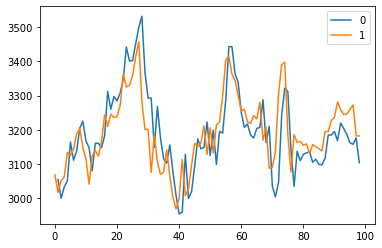

In [132]:
y_true = test_price_df.shift(1)["AMZN_price"].values
y_pred = test_pred_df["AMZN_price"].values
pd.DataFrame([y_true, y_pred]).transpose().plot()

In [173]:
test_ts = list(ts_test.data[0].copy().reshape(1, 387))
z = 0
for x in test_ts:
    z += 1
    pred = model.predict(x.reshape(1, 1, 387))
    test_ts.append(pred.reshape(387))
    if z == 7:
        break

test_ts_preds_df = pd.DataFrame(test_ts, columns=columns)

In [174]:
test_ts_preds_df

A_price  AAL_price   AAP_price  AAPL_price  ABBV_price   ABC_price  \
0  97.270000      11.39  146.830000   94.810000   97.160000  104.000000   
1  94.604492       0.00  147.712616   96.910927  102.380417  102.665672   
2  90.400383       0.00  141.205139   91.171600   98.622116   97.348526   
3  87.074287       0.00  136.721420   88.418747   95.455528   94.518730   
4  84.152122       0.00  132.318665   86.049042   92.479637   91.816505   
5  81.489799       0.00  127.955063   83.931870   89.668106   89.142853   
6  79.054924       0.00  123.676254   81.655258   87.025909   86.545990   
7  76.742111       0.00  119.895554   79.412636   84.490807   84.060692   

   ABMD_price  ABT_price   ACN_price  ADBE_price  ...  XEL_price  XLNX_price  \
0  298.610000  99.990000  223.320000  437.100000  ...  67.510000  106.810000   
1  279.437805  97.280495  223.391235  455.541565  ...  66.425102  102.326218   
2  268.489594  95.526604  215.777679  440.532654  ...  62.188271   99.989197   
3  261.127625  92.558868  208.367081  427.882416  ...  59.452606   96.441231   
4  254.658401  89.462135  201.901352  416.029755  ...  57.311565   93.337738   
5  248.428101  86.469490  196.056519  404.721710  ...  55.384178   90.575211   
6  242.319244  83.650642  190.617935  393.867462  ...  53.692261   88.369431   
7  236.112885  81.012566  185.325439  383.097321  ...  52.165833   85.951492   

   XRAY_price  XRX_price  XYL_price  YUM_price   ZBH_price  ZBRA_price  \
0   43.450000  15.820000  75.260000  93.370000  134.240000  273.340000   
1   43.390690  16.722622  71.551285  91.351021  128.761826  273.214935   
2   43.769447  17.358540  68.335983  90.133720  126.023697  261.909943   
3   42.550262  16.297657  66.065720  86.460876  120.577377  252.148407   
4   41.219276  15.565685  64.010040  83.037773  115.736076  243.404404   
5   39.749432  15.006844  61.841930  79.942902  111.369461  235.309967   
6   38.110622  14.814831  59.433811  77.087372  107.658592  227.797348   
7   36.753872  14.485603  57.425213  74.615257  104.265030  220.833984   

   ZION_price   ZTS_price  
0       32.41  146.920000  
1        0.00  145.916718  
2        0.00  136.830063  
3        0.00  130.851044  
4        0.00  125.888550  
5        0.00  121.610435  
6        0.00  117.924095  
7        0.00  114.472275  

[8 rows x 387 columns]

In [175]:
r2_scores = {}
for col in columns:
    y_true = test_price_df.iloc[:8][col].values
    y_pred = test_ts_preds_df[col].values
    r2_scores[col] = r2_score(y_true, y_pred)

In [176]:
pd.Series(r2_scores).sort_values(ascending=False).head(20)

BAX_price     0.715447
HOG_price    -0.401547
WRK_price    -1.068030
ECL_price    -1.096111
PKG_price    -1.318803
AOS_price    -1.561613
ADP_price    -1.569337
STX_price    -1.672112
VLO_price    -2.586510
LYB_price    -2.659353
BA_price     -3.238161
FFIV_price   -3.345645
CERN_price   -3.451311
HP_price     -3.928116
EMN_price    -4.785276
EXPE_price   -5.037704
FLS_price    -5.134894
QCOM_price   -5.422146
STZ_price    -5.711142
KSS_price    -5.849544
dtype: float64

<AxesSubplot:>

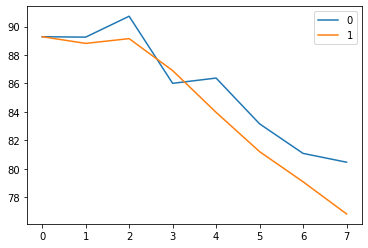

In [178]:
col = "BAX_price"
y_true = test_price_df[col].iloc[:8].values
y_pred = test_ts_preds_df[col].values
pd.DataFrame([y_true, y_pred]).transpose().plot()

## Predicting one stock with it's own performance and analyst

## Predicting stocks by industry

## Multi day

In [189]:

test = []
for i in range(1, 30, 3):
    test.append([i, i+1, i+2, i+4])

X = test

y = []
for x in test:
    y.append([(x[0]*2+x[1]), (x[2]*2+x[1]), (x[2]+x[1])])

X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
display(X_df, y_df)

0   1   2   3
0   1   2   3   5
1   4   5   6   8
2   7   8   9  11
3  10  11  12  14
4  13  14  15  17
5  16  17  18  20
6  19  20  21  23
7  22  23  24  26
8  25  26  27  29
9  28  29  30  32

0   1   2
0   4   8   5
1  13  17  11
2  22  26  17
3  31  35  23
4  40  44  29
5  49  53  35
6  58  62  41
7  67  71  47
8  76  80  53
9  85  89  59

In [334]:
X, y = ts[2]

In [335]:
len(ts)

1

In [336]:
X, y = ts[0]

In [337]:
X.shape

(9, 1, 4)

In [338]:
y.shape

(9, 3)

In [340]:
X

array([[[ 1,  2,  3,  5]],

       [[ 4,  5,  6,  8]],

       [[ 7,  8,  9, 11]],

       [[10, 11, 12, 14]],

       [[13, 14, 15, 17]],

       [[16, 17, 18, 20]],

       [[19, 20, 21, 23]],

       [[22, 23, 24, 26]],

       [[25, 26, 27, 29]]], dtype=int64)

In [339]:
y

array([[13, 17, 11],
       [22, 26, 17],
       [31, 35, 23],
       [40, 44, 29],
       [49, 53, 35],
       [58, 62, 41],
       [67, 71, 47],
       [76, 80, 53],
       [85, 89, 59]], dtype=int64)

In [379]:

columns = ["f_1", "f_2", "f_3", "f_4", "t_1", "t_2", "t_3"]
test_df = pd.concat([X_df, y_df], axis=1)
test_df.columns=columns
test_df
n_input = 8

X = test_df[[col for col in test_df.columns if 'f' in col]].values
y = test_df[[col for col in test_df.columns if 't' in col]].values

ts = TimeseriesGenerator(X, y, n_input)
X, y = ts[0]

try:
    del model
    K.clear_session()
    print('deleted')
except NameError:
    pass

model = Sequential()

#  LSTM neurons should be divisible by n_days
                                # input_shape is (n_days, X_n_features)

model.add(LSTM(n_input*30, activation='relu', input_shape=(n_input, 4)))
#model.add(Dense(64, activation='relu'))
#model.add(Dense(n_input*3, activation='relu'))
model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(3, activation='relu'))
model.compile(loss='mse', optimizer='adam')
model.fit(ts, epochs=250)

och 4/250
1/1 [==============================] - 0s 1ms/step - loss: 5147.5527
Epoch 5/250
1/1 [==============================] - 0s 1ms/step - loss: 4921.4678
Epoch 6/250
1/1 [==============================] - 0s 1ms/step - loss: 4607.5430
Epoch 7/250
1/1 [==============================] - 0s 1ms/step - loss: 4176.1426
Epoch 8/250
1/1 [==============================] - 0s 1ms/step - loss: 3806.5305
Epoch 9/250
1/1 [==============================] - 0s 1ms/step - loss: 3169.7373
Epoch 10/250
1/1 [==============================] - 0s 1ms/step - loss: 2410.4404
Epoch 11/250
1/1 [==============================] - 0s 1ms/step - loss: 1922.7899
Epoch 12/250
1/1 [==============================] - 0s 1ms/step - loss: 1563.0642
Epoch 13/250
1/1 [==============================] - 0s 1ms/step - loss: 1284.9032
Epoch 14/250
1/1 [==============================] - 0s 1ms/step - loss: 1008.4441
Epoch 15/250
1/1 [==============================] - 0s 1ms/step - loss: 621.2073
Epoch 16/250
1/1 [=======

In [380]:
model.predict(ts)

array([[77.317726, 80.69548 , 54.666607],
       [86.56876 , 89.81671 , 61.29236 ]], dtype=float32)

In [381]:
y

array([[76, 80, 53],
       [85, 89, 59]], dtype=int64)

In [382]:
X

array([[[ 1,  2,  3,  5],
        [ 4,  5,  6,  8],
        [ 7,  8,  9, 11],
        [10, 11, 12, 14],
        [13, 14, 15, 17],
        [16, 17, 18, 20],
        [19, 20, 21, 23],
        [22, 23, 24, 26]],

       [[ 4,  5,  6,  8],
        [ 7,  8,  9, 11],
        [10, 11, 12, 14],
        [13, 14, 15, 17],
        [16, 17, 18, 20],
        [19, 20, 21, 23],
        [22, 23, 24, 26],
        [25, 26, 27, 29]]], dtype=int64)

## Completely variable TS prediction and forecasting

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1

os.chdir('..')
model_df = pd.read_pickle("./data/modeling/model_df.pkl")

display(model_df.head())

performance_cols = pd.read_pickle('./data/modeling/performance.pkl').columns
print(len(performance_cols), "performance columns")
remove_cols = list([col for col in performance_cols if 'price' not in col])
print("removing", len(remove_cols), "columns that are performance based")
model_df_analyst_price = model_df.drop(remove_cols, axis=1)
print("Shape", model_df_analyst_price.shape)
columns = [col.split("_")[1] for col in model_df_analyst_price.columns if 'AAPL' in col]
columns

Using TensorFlow backend.


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09        5019.0       2155.0                 0       0.164   
2019-08-12        5019.0       2155.0                 0       0.164   
2019-08-13        5019.0       2155.0                 0       0.164   
2019-08-14        5019.0       2155.0                 0       0.164   
2019-08-15        5090.0       1765.0                 0       0.164   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09          0.94402        4.29809         4.40182       2.167070e+10   
2019-08-12          0.95571        4.24551         4.34797       2.140126e+10   
2019-08-13          0.98454        4.12119         4.22065       2.076411e+10   
2019-08-14          0.96984        4.18366         4.28463       2.108427e+10   
2019-08-15          1.00015        4.28332         4.06782       2.036590e+10   

            A_PriceToCashFlow  A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                 ...                                    
2019-08-09           16.57368  19.8  ...                3.0           3.0   
2019-08-12           16.37095  19.2  ...                3.0           3.0   
2019-08-13           15.89156  19.5  ...                3.0           3.0   
2019-08-14           16.13245  18.9  ...                3.0           3.0   
2019-08-15           16.05056  20.8  ...                3.0           3.0   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3             88.0           87.0   
2019-08-12                   1          3             88.0           87.0   
2019-08-13                   1          5             88.0           87.0   
2019-08-14                   1          5             88.0           87.0   
2019-08-15                   1          5             88.0           87.0   

            ZTS_SPGrowthStability  ZTS_SPFinancialHealth  \
date                                                       
2019-08-09                   30.0                   58.0   
2019-08-12                   30.0                   58.0   
2019-08-13                   28.0                   56.0   
2019-08-14                   28.0                   56.0   
2019-08-15                   30.0                   57.0   

            ZTS_ThomsonReutersVerus  ZTS_ThomsonReutersIBES  
date                                                         
2019-08-09                      3.0                   1.941  
2019-08-12                      3.0                   1.941  
2019-08-13                      3.0                   1.941  
2019-08-14                      3.0                   1.941  
2019-08-15                      3.0                   1.941  

[5 rows x 13545 columns]

7353 performance columns
removing 6966 columns that are performance based
Shape (347, 6579)


['price',
 'Argus',
 'StarMine',
 'ColumbineCapital',
 'FordEquityResearch',
 'ISSEVA',
 'Jefferson',
 'McLeanCapital',
 'NedDavis',
 'TradingCentral',
 'Zacks',
 'SPValuation',
 'SPQuality',
 'SPGrowthStability',
 'SPFinancialHealth',
 'ThomsonReutersVerus',
 'ThomsonReutersIBES']

In [4]:
n_input = 1

df = model_df_analyst_price.copy()

n_features = df.shape[1]

val_days = 3

df_train = df[:-val_days]
df_val = df[-val_days:]

batch_size = round(n_features/3)

ts_train = TimeseriesGenerator(df_train.values, df_train.values, length=n_input, batch_size=batch_size)
ts_val = TimeseriesGenerator(df_val.values, df_val.values, length=n_input, batch_size=batch_size)

X, y = ts_train[0]
#display(X, y)

try:
    del model
    K.clear_session()
    print('deleted')
except NameError:
    pass

model = Sequential()

#  LSTM neurons should be divisible by n_days
                                # input_shape is (n_days, X_n_features)
n_features = df.shape[1]
activation = 'relu'
model.add(LSTM(batch_size, activation=activation, input_shape=(n_input, n_features)))
for i in range(4):
    #model.add(Dense(n_features, activation='relu'))
    model.add(LeakyReLU(batch_size))#, activation='relu'))
    model.add(Dropout(.01))

# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))

#model.add(Dense(n_input*3, activation='relu'))
model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(n_features, activation=activation,
                kernel_regularizer=l2(5)))
model.compile(loss='mse', optimizer='adam')
check_point_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./data/models/best_analyst', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True
)
model.fit(ts_train, epochs=1000, verbose=1, batch_size=batch_size, workers=0)#, callbacks=[check_point_callback])

pd.DataFrame(model.predict(ts_train), columns=df.columns).iloc[0].value_counts()


NameError: name 'model_df_analyst_price' is not defined

In [64]:
df_pred = pd.DataFrame(model.predict(ts_train), columns=df.columns, index=df_train[1:].index)
df_pred.iloc[0].value_counts()

0.000000      4217
42.662792        1
24.333290        1
84.333038        1
76.330727        1
              ... 
57.830830        1
48.330627        1
19.285360        1
37.625263        1
134.991135       1
Name: 2019-08-12 00:00:00, Length: 2363, dtype: int64

In [19]:
import matplotlib.pyplot as plt

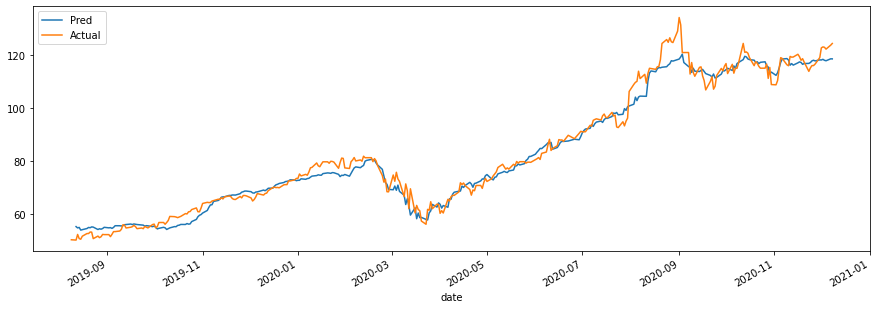

In [65]:
fig, ax = plt.subplots(figsize=(15, 5))
df_pred['AAPL_price'].plot(ax=ax)
df_train['AAPL_price'].plot(ax=ax)
plt.legend(labels=['Pred', 'Actual'])


In [21]:
X, y = ts_train[0]
X[-1]

array([[114.4 ,  17.21, 153.68, ...,  78.  ,   3.  ,   2.05]])

A_price                    117.01
AAL_price                   17.63
AAP_price                  152.78
AAPL_price                 124.38
ABBV_price                 107.69
                            ...  
ZTS_SPQuality               87.00
ZTS_SPGrowthStability       58.00
ZTS_SPFinancialHealth       78.00
ZTS_ThomsonReutersVerus      3.00
ZTS_ThomsonReutersIBES       2.05
Name: 2020-12-08 00:00:00, Length: 6579, dtype: float64

In [73]:
df_train.iloc[-1].values.reshape(1, 1, n_features)

array([[[117.01,  17.63, 152.78, ...,  78.  ,   3.  ,   2.05]]])

In [83]:
pred_idx = df_train.iloc[[-1]].index.union(df_val.index)

val_start_test = list(df_train.iloc[-1].values.reshape(1, n_features))
preds = [df_train.iloc[-1].values]
z = 0
for i in val_start_test:
    z += 1
    pred = model.predict(i.reshape(1, 1, n_features))
    val_start_test.append(pred)
    preds.append(pred.reshape(n_features))
    if z == val_days:
        break
val_preds = pd.DataFrame(preds, columns=df_val.columns, index=pred_idx)
    

In [84]:
price_cols = [col for col in val_preds.columns if 'price' in col]

In [85]:
df_val.shape

(3, 6579)

In [86]:
df_score = df.loc[pred_idx]

In [87]:
r2_scores = {}
for col in price_cols:
    score = r2_score(val_preds[col], df_score[col])
    r2_scores[col.split('_')[0]] = score
pd.Series(r2_scores).sort_values(ascending=False).head(20)


CNC     0.716548
HUM     0.672963
CBOE    0.666227
SWKS    0.607521
MLM     0.572075
ZBH     0.557785
RCL     0.538192
ABC     0.469437
BWA     0.457794
VMC     0.414090
PFG     0.408587
ABMD    0.395959
CMI     0.374890
NTRS    0.357891
CAH     0.353874
ALLE    0.336391
ADS     0.327923
PPL     0.317805
BIIB    0.309615
MA      0.307729
dtype: float64

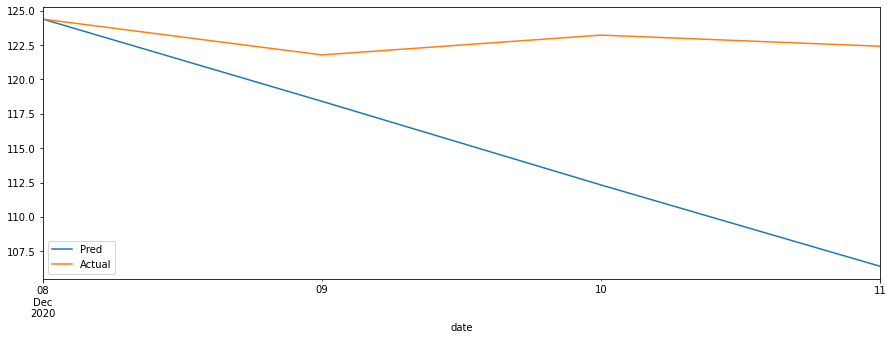

In [91]:
sym = 'AAPL'

fig, ax = plt.subplots(figsize=(15, 5))
val_preds[f'{sym}_price'].plot(ax=ax)
df_score[f'{sym}_price'].plot(ax=ax)
plt.legend(labels=['Pred', 'Actual'])

## Predicting with performance columns

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers


os.chdir('..')
model_df = pd.read_pickle("./data/modeling/performance.pkl")
model_df

Using TensorFlow backend.


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09        5019.0       2155.0                 0       0.164   
2019-08-12        5019.0       2155.0                 0       0.164   
2019-08-13        5019.0       2155.0                 0       0.164   
2019-08-14        5019.0       2155.0                 0       0.164   
2019-08-15        5090.0       1765.0                 0       0.164   
...                  ...          ...               ...         ...   
2020-12-07        5339.0       1441.0             18631       0.194   
2020-12-08        5339.0       1441.0             18631       0.194   
2020-12-09        5339.0       1441.0             18631       0.194   
2020-12-10        5339.0       1441.0             18631       0.194   
2020-12-11        5339.0       1441.0             18631       0.194   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09          0.94402        4.29809         4.40182       2.167070e+10   
2019-08-12          0.95571        4.24551         4.34797       2.140126e+10   
2019-08-13          0.98454        4.12119         4.22065       2.076411e+10   
2019-08-14          0.96984        4.18366         4.28463       2.108427e+10   
2019-08-15          1.00015        4.28332         4.06782       2.036590e+10   
...                     ...            ...             ...                ...   
2020-12-07          0.67390        7.23084         6.64825       3.615390e+10   
2020-12-08          0.67832        7.18375         6.60495       3.592440e+10   
2020-12-09          0.66319        7.34764         6.75563       3.672306e+10   
2020-12-10          0.66667        7.30934         6.72042       3.653640e+10   
2020-12-11          0.65314        7.46067         6.85956       3.727386e+10   

            A_PriceToCashFlow  A_PE  ...  ZTS_PE  ZTS_ReturnonEquity  \
date                                 ...                               
2019-08-09           16.57368  19.8  ...    44.2             60.9013   
2019-08-12           16.37095  19.2  ...    43.8             60.9013   
2019-08-13           15.89156  19.5  ...    44.1             60.9013   
2019-08-14           16.13245  18.9  ...    43.0             60.9013   
2019-08-15           16.05056  20.8  ...    43.7             60.9013   
...                       ...   ...  ...     ...                 ...   
2020-12-07           34.56182  49.7  ...    45.7             55.2262   
2020-12-08           34.33671  50.9  ...    45.8             55.2262   
2020-12-09           35.12009  50.6  ...    45.7             55.2262   
2020-12-10           34.93700  51.7  ...    45.6             55.2262   
2020-12-11           35.66036  51.5  ...    46.0             55.2262   

            ZTS_FreeCashFlow  ZTS_TotalDebtToEquity  \
date                                                  
2019-08-09            1463.0              289.61355   
2019-08-12            1463.0              289.61355   
2019-08-13            1463.0              289.61355   
2019-08-14            1463.0              289.61355   
2019-08-15            1463.0              289.61355   
...                      ...                    ...   
2020-12-07            1523.0              240.88003   
2020-12-08            1523.0              240.88003   
2020-12-09            1523.0              240.88003   
2020-12-10            1523.0              240.88003   
2020-12-11            1523.0              240.88003   

            ZTS_PricePerformance52Weeks  ZTS_PricePerformanceYTD  \
date                                                               
2019-08-09                     33.12239                 45.09002   
2019-08-12                     36.39040                 46.21230   
2019-08-13                     35.17993                 44.91466   
2019-08-14                     36.64256  

In [4]:
n_input = 1

df = model_df.copy()

n_features = df.shape[1]

val_days = 3

df_train = df[:-val_days]
df_val = df[-val_days:]

sufferage = 3

batch_size = round(n_features/sufferage)

ts_train = TimeseriesGenerator(df_train.values, df_train.values, length=n_input, batch_size=batch_size)
ts_val = TimeseriesGenerator(df_val.values, df_val.values, length=n_input, batch_size=batch_size)

X, y = ts_train[0]
#display(X, y)

try:
    del model
    K.clear_session()
    print('deleted')
except NameError:
    pass

model = Sequential()

#  LSTM neurons should be divisible by n_days
                                # input_shape is (n_days, X_n_features)
n_features = df.shape[1]
activation = 'relu'
model.add(LSTM(batch_size, activation=activation, input_shape=(n_input, n_features),
               kernel_initializer=initializers.RandomNormal(.5)))
for i in range(8):
    #model.add(Dense(batch_size, activation='relu'))
    model.add(LeakyReLU(batch_size/(i+1)))
    model.add(Dropout(.01))

# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))

#model.add(Dense(n_input*3, activation='relu'))
model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(n_features, activation=activation,
                kernel_regularizer=l2(5)))
model.compile(loss='mse', optimizer='rmsprop')
check_point_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./data/models/best_analyst', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True
)
model.fit(ts_train, epochs=6600, verbose=1, batch_size=batch_size, workers=0)#, callbacks=[check_point_callback])

pd.DataFrame(model.predict(ts_train), columns=df.columns).iloc[0].value_counts()

/6600
1/1 [==============================] - 0s 45ms/step - loss: 77444412242332599262904320.0000
Epoch 366/6600
1/1 [==============================] - 0s 45ms/step - loss: 77446220023251822798962688.0000
Epoch 367/6600
1/1 [==============================] - 0s 46ms/step - loss: 77466253187315871372017664.0000
Epoch 368/6600
1/1 [==============================] - 0s 45ms/step - loss: 77380245243072200587608064.0000
Epoch 369/6600
1/1 [==============================] - 0s 45ms/step - loss: 77466612898825308708274176.0000
Epoch 370/6600
1/1 [==============================] - 0s 46ms/step - loss: 77461429363740596324270080.0000
Epoch 371/6600
1/1 [==============================] - 0s 44ms/step - loss: 77388620064881664724041728.0000
Epoch 372/6600
1/1 [==============================] - 0s 46ms/step - loss: 77438988899574928654729216.0000
Epoch 373/6600
1/1 [==============================] - 0s 45ms/step - loss: 77412278014156197223989248.0000
Epoch 374/6600
1/1 [==========================

KeyboardInterrupt: 

In [4]:
pd.DataFrame(model.predict(ts_train), columns=df.columns).iloc[0].value_counts()

0.000000e+00    13473
7.057625e+09        1
1.388602e+11        1
8.818877e+11        1
2.635176e+11        1
                ...  
4.696130e+10        1
1.009127e+12        1
3.515532e+10        1
1.111352e+11        1
1.143285e+10        1
Name: 0, Length: 73, dtype: int64

## Correlation check
> performance doesn't seem to be mixing well with the prediction of future prices.  We will have to devise a way to find the best overall columns, and use those to try and model

> The steps we will take to do this are as follows:
> * ~~Scale all of the data between the min and max of the whole dataset so that floats are accounted for for every data point~~
> * We don't have to worry about scaling because pandas correlation takes care of it
> * Difference the data so that it is showing how much a feature went up or down rather than the feature itself
> * for each column shift it backwards by one so the correlation to other columns going up or down would show through

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers


os.chdir('..')
model_df = pd.read_pickle("./data/modeling/model_df.pkl")
model_df

Using TensorFlow backend.


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09        5019.0       2155.0                 0       0.164   
2019-08-12        5019.0       2155.0                 0       0.164   
2019-08-13        5019.0       2155.0                 0       0.164   
2019-08-14        5019.0       2155.0                 0       0.164   
2019-08-15        5090.0       1765.0                 0       0.164   
...                  ...          ...               ...         ...   
2020-12-07        5339.0       1441.0             18631       0.194   
2020-12-08        5339.0       1441.0             18631       0.194   
2020-12-09        5339.0       1441.0             18631       0.194   
2020-12-10        5339.0       1441.0             18631       0.194   
2020-12-11        5339.0       1441.0             18631       0.194   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09          0.94402        4.29809         4.40182       2.167070e+10   
2019-08-12          0.95571        4.24551         4.34797       2.140126e+10   
2019-08-13          0.98454        4.12119         4.22065       2.076411e+10   
2019-08-14          0.96984        4.18366         4.28463       2.108427e+10   
2019-08-15          1.00015        4.28332         4.06782       2.036590e+10   
...                     ...            ...             ...                ...   
2020-12-07          0.67390        7.23084         6.64825       3.615390e+10   
2020-12-08          0.67832        7.18375         6.60495       3.592440e+10   
2020-12-09          0.66319        7.34764         6.75563       3.672306e+10   
2020-12-10          0.66667        7.30934         6.72042       3.653640e+10   
2020-12-11          0.65314        7.46067         6.85956       3.727386e+10   

            A_PriceToCashFlow  A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                 ...                                    
2019-08-09           16.57368  19.8  ...                3.0           3.0   
2019-08-12           16.37095  19.2  ...                3.0           3.0   
2019-08-13           15.89156  19.5  ...                3.0           3.0   
2019-08-14           16.13245  18.9  ...                3.0           3.0   
2019-08-15           16.05056  20.8  ...                3.0           3.0   
...                       ...   ...  ...                ...           ...   
2020-12-07           34.56182  49.7  ...                3.0           3.0   
2020-12-08           34.33671  50.9  ...                3.0           3.0   
2020-12-09           35.12009  50.6  ...                3.0           3.0   
2020-12-10           34.93700  51.7  ...                3.0           3.0   
2020-12-11           35.66036  51.5  ...                3.0           3.0   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3             88.0           87.0   
2019-08-12                   1          3             88.0           87.0   
2019-08-13                   1          5             88.0           87.0   
2019-08-14                   1          5             88.0           87.0   
2019-08-15                   1          5             88.0           87.0   
...                        ...        ...              ...            ...   
2020-12-07                   3          3             86.0           87.0   
2020-12-08                   3          3             86.0           87.0   
2020-12-09                   3          3             86.0           88.0   
2020-12-10                   3          3             86.0           88.0   
2020-12-11                   3          3             86.0           87.0   

            ZTS_SPGrowthStabil

``` python
from sklearn.preprocessing import MinMaxScaler

# Getting the miniumum and maximum of the whole dataframe
model_min_max = model_df.describe().loc[['max', 'min']]
df_min = model_min_max.transpose()['min'].min().min()
df_max = model_min_max.transpose()['max'].max().max()
df_min, df_max

# Scaling the dataframe
scaler = MinMaxScaler((df_min, df_max))
model_df_scaled = pd.DataFrame(scaler.fit_transform(model_df), columns=model_df.columns)
model_df_scaled.head()
```

In [2]:
def split_df_sym_col(df, sym=False, col=False):
    """returns a data frame where sym and col match"""
    # TODO add if list of syms and/or list of cols
    _col = col
    if sym:
        df = df[[col for col in df.columns if col.split('_')[0] == sym]]
    if col:
        df = df[[col for col in df.columns if col.split('_')[1] == _col]]
    return df.copy()


In [3]:
model_df_aapl = split_df_sym_col(model_df, "AAPL")
model_df_aapl.head()

AAPL_RevenueTTM  AAPL_TotalCash  AAPL_ExDividendDate  \
date                                                               
2019-08-09         259034.0         94880.0                18117   
2019-08-12         259034.0         94880.0                    0   
2019-08-13         259034.0         94880.0                    0   
2019-08-14         259034.0         94880.0                    0   
2019-08-15         259034.0         94880.0                    0   

            AAPL_Dividend  AAPL_DividendYield  AAPL_PriceToBook  \
date                                                              
2019-08-09           0.77             1.51403           9.55691   
2019-08-12           0.77             1.53241           9.44229   
2019-08-13           0.77             1.53631           9.41833   
2019-08-14           0.77             1.47390           9.81718   
2019-08-15           0.77             1.51911           9.52497   

            AAPL_PriceToSales  AAPL_EnterpriseValue  AAPL_PriceToCashFlow  \
date                                                                        
2019-08-09            3.65644          9.353597e+11              13.96616   
2019-08-12            3.61259          9.243031e+11              13.79865   
2019-08-13            3.60342          9.219921e+11              13.76363   
2019-08-14            3.75602          9.604636e+11              14.34650   
2019-08-15            3.64422          9.322783e+11              13.91948   

            AAPL_PE  ...  AAPL_McLeanCapital  AAPL_NedDavis  \
date                 ...                                      
2019-08-09     17.1  ...                 3.0            3.0   
2019-08-12     17.0  ...                 3.0            3.0   
2019-08-13     17.8  ...                 3.0            3.0   
2019-08-14     17.2  ...                 3.0            3.0   
2019-08-15     17.1  ...                 3.0            3.0   

            AAPL_TradingCentral  AAPL_Zacks  AAPL_SPValuation  AAPL_SPQuality  \
date                                                                            
2019-08-09                    3           3              87.0            93.0   
2019-08-12                    3           3              87.0            93.0   
2019-08-13                    3           3              87.0            93.0   
2019-08-14                    3           3              87.0            93.0   
2019-08-15                    3           3              87.0            93.0   

            AAPL_SPGrowthStability  AAPL_SPFinancialHealth  \
date                                                         
2019-08-09                    14.0                    73.0   
2019-08-12                    14.0                    73.0   
2019-08-13                    14.0                    73.0   
2019-08-14                    14.0                    73.0   
2019-08-15                    14.0                    73.0   

            AAPL_ThomsonReutersVerus  AAPL_ThomsonReutersIBES  
date                                                           
2019-08-09                       3.0                     2.25  
2019-08-12                       3.0                     2.25  
2019-08-13                       3.0                     2.25  
2019-08-14                       3.0                     2.25  
2019-08-15                       3.0                     2.25  

[5 rows x 35 columns]

### Test correlation check by differencing price
> i.e For each feature seeing how much the difference in one feature one day the difference of another feature or price itself the next day.

In [4]:
df_test = model_df_aapl.diff().copy()
col = 'TotalCash'
df_test[f'AAPL_{col}'] = df_test[f'AAPL_{col}'].shift(1)
correlation = df_test.corr()[f'AAPL_{col}'].sort_values(ascending=False).drop(f'AAPL_{col}')
display(correlation, f"Correlation sum: {correlation.sum()}")

AAPL_SPGrowthStability          4.454124e-01
AAPL_SPFinancialHealth          2.276527e-01
AAPL_TotalReturn1Yr             8.143076e-02
AAPL_PricePerformance52Weeks    8.131481e-02
AAPL_TotalReturn3Yr             6.239258e-02
AAPL_StarMine                   1.964556e-02
AAPL_PricePerformanceYTD        1.807676e-02
AAPL_PriceToSales               7.581566e-03
AAPL_PriceToCashFlow            7.410502e-03
AAPL_ISSEVA                     6.414115e-03
AAPL_EnterpriseValue            5.160271e-03
AAPL_PriceToBook                4.953292e-03
AAPL_Dividend                   4.783139e-03
AAPL_ReturnonEquity             1.484194e-03
AAPL_FreeCashFlow               1.358750e-03
AAPL_RevenueTTM                 1.133233e-03
AAPL_VolumeAvg90Day             2.012503e-04
AAPL_Zacks                      4.028555e-20
AAPL_NedDavis                   0.000000e+00
AAPL_TradingCentral             0.000000e+00
AAPL_FordEquityResearch        -1.947975e-04
AAPL_McLeanCapital             -2.654896e-04
AAPL_Jeffe

'Correlation sum: 0.4302702720871865'

#### Make a dataframe with the correlations
> Here is a quick example of the difference correlation search working on one symbol

In [5]:
def get_correlation(df, sym):
    df = split_df_sym_col(df, sym).diff().copy()
    correlation_totals = {}
    for col in df.columns:
        _df = df.copy()
        _df[col] = _df[col].shift(1)
        correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
    return correlation_totals.copy()

print("Correlation sum between columns for VLO")
correlation = get_correlation(model_df, "VLO")
pd.Series(correlation).sort_values(ascending=False)

Correlation sum between columns for VLO


price                      5.723197
DividendYield              0.852849
FreeCashFlow               0.820690
ReturnonEquity             0.726434
Zacks                      0.711228
PE                         0.600986
Jefferson                  0.520789
ISSEVA                     0.437978
SPFinancialHealth          0.436488
McLeanCapital              0.386591
StarMine                   0.315611
SPQuality                  0.307877
ExDividendDate             0.307451
SPGrowthStability          0.241776
TotalReturn1Yr             0.115620
PricePerformance52Weeks    0.114218
ThomsonReutersVerus        0.100932
Dividend                   0.085292
ColumbineCapital           0.000000
Argus                      0.000000
NedDavis                   0.000000
SPValuation               -0.025330
RevenueTTM                -0.112385
TotalDebtToEquity         -0.193888
FordEquityResearch        -0.237616
TotalCash                 -0.279920
PricePerformanceYTD       -0.315386
ThomsonReutersIBES        -0

In [6]:
all_symbols = [col.split('_')[0] for col in model_df.columns if 'price' in col]
len(all_symbols)

387

In [7]:
import time
time.time() 

1607955100.341688

In [8]:
start_time = time.time()

correlation_all = {}
for sym in all_symbols:
    correlation_all[sym] = get_correlation(model_df, sym)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 21.32 seconds


In [9]:
corr_df = pd.DataFrame(correlation_all)
corr_df.head()

A       AAL       AAP      AAPL      ABBV       ABC  \
RevenueTTM      0.442689  0.868187  1.331119  1.004465  1.038024  1.518557   
TotalCash      -0.616248  0.189305 -1.661618  0.430270  0.422228  0.971214   
ExDividendDate  0.239137 -0.196700  0.395110  0.455486  0.731148  0.838066   
Dividend        0.214521  0.000000  0.252420  0.132106  0.944311  0.555199   
DividendYield   1.760367 -0.952138  1.028690  0.886054  1.136758  1.814507   

                    ABMD       ABT       ACN      ADBE  ...       XEL  \
RevenueTTM      1.143176 -0.312833 -0.384748 -0.329954  ...  0.375847   
TotalCash      -0.250408 -0.366070  0.277710 -0.061857  ...  0.242424   
ExDividendDate  0.000000 -0.526181  0.535574  0.000000  ...  0.077349   
Dividend        0.000000  0.302990  0.283193  0.000000  ... -0.013939   
DividendYield   0.000000  1.522364  1.745392  0.000000  ...  0.595022   

                    XLNX      XRAY       XRX       XYL       YUM       ZBH  \
RevenueTTM      0.208423 -0.050730 -0.373581  0.293397  0.626591  0.339449   
TotalCash       0.301309 -0.115179 -0.402169  0.225538 -0.799362  0.255451   
ExDividendDate -0.000770 -0.173043  0.763748  0.389709  0.242663  0.245694   
Dividend        0.099561  0.000000  0.000000  0.477487  0.060731  0.000000   
DividendYield   1.147229 -0.391397  0.623415  1.244173  0.272303  0.146626   

                    ZBRA      ZION       ZTS  
RevenueTTM      0.361087 -0.062239 -1.210490  
TotalCash      -0.025607  0.259132 -0.726069  
ExDividendDate  0.000000  0.297233 -0.545313  
Dividend        0.000000  0.000000  0.245320  
DividendYield   0.000000  0.268847  1.352459  

[5 rows x 387 columns]

In [10]:
corr_df.to_csv("./bin/all_column_correlation_each_other.csv")

> Getting the max, min, mean, and sum for each column

In [11]:
totals_df = corr_df.transpose().describe().loc[['min', 'max', 'mean']].transpose()
sum_df = pd.DataFrame(corr_df.transpose().sum().sort_values(ascending=False))
totals_df['sum'] = sum_df
totals_sorted = totals_df.sort_values(by=['sum', 'max'], ascending=False).astype('float32')
totals_sorted.round(1).to_csv("./bin/all_column_correlation_display.csv")

In [12]:
totals_sorted = pd.read_csv('./bin/all_column_correlation_display.csv') \
    .rename({"Unnamed: 0": "column"}, axis=1).set_index('column', drop=True)
    
totals_sorted.style.background_gradient(cmap='PRGn_r')

> **After checking the above we will be dropping the following columns because they have the lowest total correlation (positive or negative) to the rest of the columns.  This will make the neural network more accurate**

> * ReturnonEquity
> * ThomsonReutersVerus
> * TotalCash
> * SPFinancialHealth
> * ISSEVA
> * SPValuation
> * SPGrowthStability
> * SPQuality
> * ExDividendDate
> * Zacks
> * NedDavis
> * Dividend
> * Argus
> * Jefferson
> * McLeanCapital
> * StarMine
> * TradingCentral
> * TotalDebtToEquity
> * ColumbineCapital
> * ThomsonReutersIBES

## Find price correlation
> From the above I devised I could find what most correlates possitively or negatively specifically to price.  We will do that before attempting to model with the columns dropped out of the dataset.
> * Shift price diff back by one

In [13]:
model_df = pd.read_pickle("./data/modeling/model_df.pkl")

In [14]:
# New function with list functionality
def split_df_sym_col(df, sym=False, col=False):
    """returns a data frame where sym and col match"""
    _col = col
    if sym:
        if isinstance(sym, str):
            sym = [sym]
        df = df[[col for col in df.columns if col.split('_')[0] in sym]]
    if _col:
        if isinstance(_col, str):
            _col = [_col]
        df = df[[col for col in df.columns if col.split('_')[1] in _col]]
    return df.copy()
split_df_sym_col(model_df, ['AAPL', 'VLO'], 'price').head(3)

AAPL_price  VLO_price
date                             
2019-08-09     50.2350      78.85
2019-08-12     50.1200      77.15
2019-08-13     52.2425      78.74

In [15]:
df = model_df.copy()
correlation_totals = {}
#for col in df.columns:
col = 'AAPL_Zacks'
sym = 'AAPL'
_df = split_df_sym_col(df, sym, [col.split('_')[1], 'price']).diff().copy()
_df[col] = _df[col].shift(1)
correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
correlation_totals.copy()

{'Zacks': 0.008056048849499224}

In [16]:
# Shift price back by one
def get_correlation_price(df, sym):
    df = split_df_sym_col(df, sym).diff().copy()
    correlation_totals = {}
    for col in df.columns:
        _df = df.copy()
        if col == f'{sym}_price':  # for correlation of price tomorrow with itself today
            _df = split_df_sym_col(df, sym, ['price']).copy()
            _df2 = _df.copy().rename({col: 'price_diff_before'}, axis=1)
            _df = pd.concat([_df, _df2.shift(-1)], axis=1)
            correlation_totals[col.split('_')[1]] = _df.corr()['price_diff_before'].drop('price_diff_before').sum()
        else:
            _df = split_df_sym_col(df, sym, [col.split('_')[1], 'price']).copy()
            _df[f'{sym}_price'] = _df[f'{sym}_price'].shift(-1)
            correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
    return correlation_totals.copy()

print("Correlation to price between columns for VLO")
correlation = get_correlation_price(model_df, "VLO")
pd.Series(correlation).sort_values(ascending=False)

Correlation to price between columns for VLO


ThomsonReutersIBES         0.112916
ReturnonEquity             0.097461
RevenueTTM                 0.077050
ExDividendDate             0.073396
PriceToBook                0.057898
TotalReturn3Yr             0.052132
Zacks                      0.049982
FreeCashFlow               0.037234
PricePerformance52Weeks    0.036318
ISSEVA                     0.033826
TotalReturn1Yr             0.032472
PricePerformanceYTD        0.031268
EnterpriseValue            0.029944
ThomsonReutersVerus        0.024154
SPGrowthStability          0.023151
Dividend                   0.013031
StarMine                   0.008258
PriceToSales               0.002930
Argus                      0.000000
NedDavis                   0.000000
ColumbineCapital           0.000000
SPFinancialHealth         -0.009536
DividendYield             -0.012654
Jefferson                 -0.014353
FordEquityResearch        -0.019356
price                     -0.029948
SPValuation               -0.033483
SPQuality                 -0

> Thus if ThomsonReuters goes up for VLO it is likely that price will go up.  Let's plot it and see

In [17]:
len(model_df)

347

Text(0.5, 1.0, 'VLO correlation to ThomsonReutersIBES')

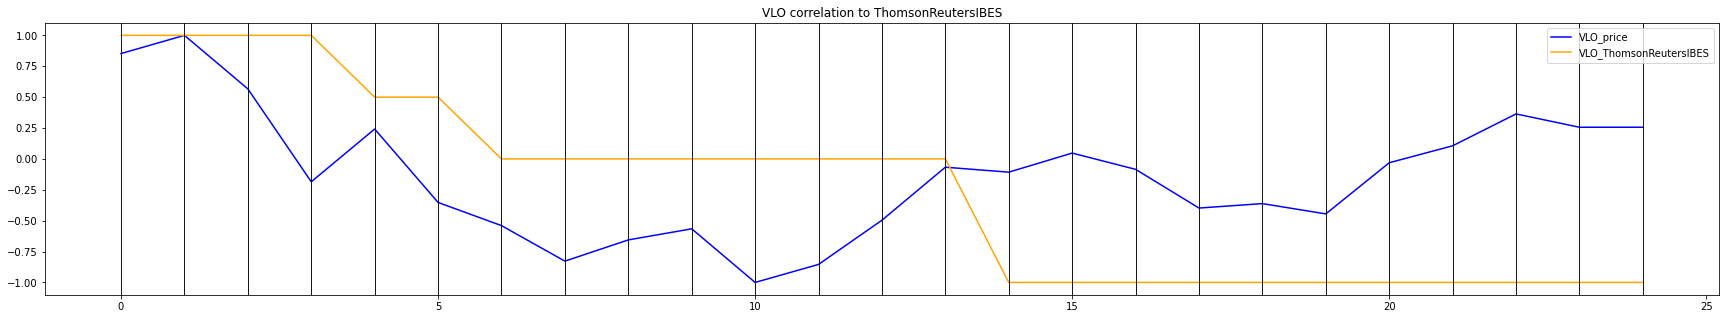

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1, 1))
temp_df = split_df_sym_col(model_df, 'VLO', ['ThomsonReutersIBES', 'price'])[150:175]
fig, ax = plt.subplots(figsize=(30, 5))
pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns).plot(ax=ax, color=['blue', 'orange'])
for i in range(len(temp_df)):
    ax.axvline(i, linewidth=.9, c='black')
ax.set_title("VLO correlation to ThomsonReutersIBES")

> You can see above that most of the time when ThomsonReutersIBES goes one direction, price goes the same direction the following day,  this is a small window of the whole at day 150 -> day 175

> It seems PE has a strong negative correlation to price for VLO, we'll plot that as well

Text(0.5, 1.0, 'VLO correlation to VolumeAvg90Day')

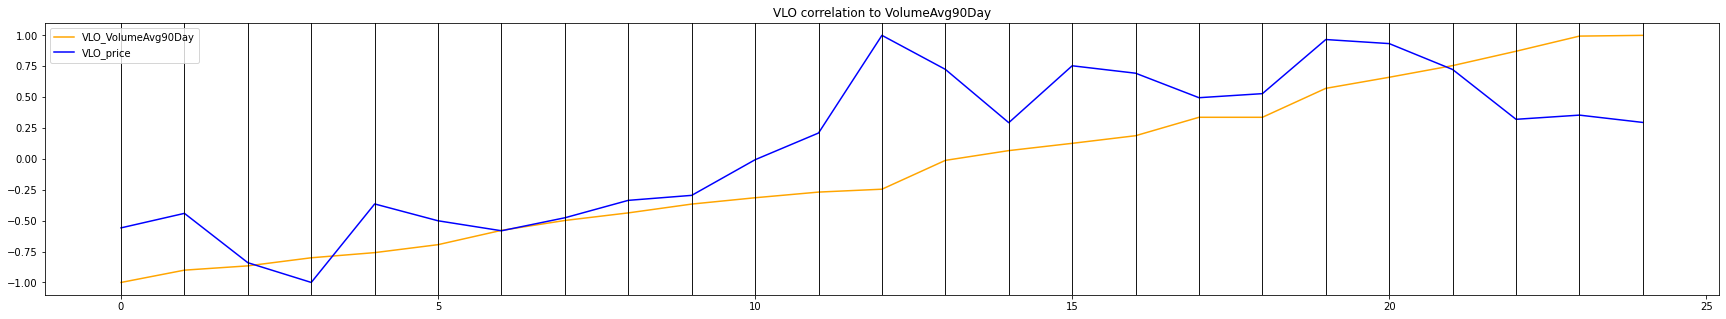

In [43]:
scaler = MinMaxScaler((-1, 1))
temp_df = split_df_sym_col(model_df, 'VLO', ['VolumeAvg90Day', 'price'])[175:200]
fig, ax = plt.subplots(figsize=(30, 5))
pd.DataFrame(scaler.fit_transform(temp_df), columns=temp_df.columns).plot(ax=ax, color=['orange', 'blue'])
for i in range(len(temp_df)):
    ax.axvline(i, linewidth=.9, c='black')
ax.set_title("VLO correlation to VolumeAvg90Day")

> Again this is a small window but you can see price going down the next day after PE goes up

In [20]:
start_time = time.time()

correlation_all = {}
for sym in all_symbols:
    correlation_all[sym] = get_correlation_price(model_df, sym)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 21.01 seconds


In [21]:
corr_df = pd.DataFrame(correlation_all)
corr_df.head()

A       AAL       AAP      AAPL      ABBV       ABC  \
RevenueTTM     -0.002594  0.034040 -0.050596  0.038229 -0.018559  0.078927   
TotalCash      -0.018061  0.033917  0.000787 -0.017051  0.021847  0.049764   
ExDividendDate  0.082632  0.038836 -0.053248  0.061184 -0.053975  0.112655   
Dividend        0.063250  0.000000 -0.031627  0.074331 -0.007289  0.129825   
DividendYield  -0.125085  0.054900 -0.093776 -0.015540 -0.152102 -0.145947   

                    ABMD       ABT       ACN      ADBE  ...       XEL  \
RevenueTTM      0.098643 -0.021408 -0.072365  0.066213  ...  0.028306   
TotalCash       0.041873  0.012757  0.098561 -0.001208  ... -0.007146   
ExDividendDate  0.000000 -0.089041 -0.053463  0.000000  ...  0.093922   
Dividend        0.000000 -0.005652  0.039723  0.000000  ... -0.018208   
DividendYield   0.000000 -0.086628 -0.138477  0.000000  ... -0.111480   

                    XLNX      XRAY       XRX       XYL       YUM       ZBH  \
RevenueTTM     -0.024739 -0.017002 -0.022379 -0.050595  0.056714  0.019541   
TotalCash      -0.015280  0.085978  0.025726  0.029860 -0.132198 -0.048984   
ExDividendDate -0.006591  0.036874  0.015424  0.046448 -0.017512  0.007576   
Dividend       -0.061767  0.000000  0.000000  0.052387  0.052330  0.000000   
DividendYield  -0.127171 -0.024948 -0.114582 -0.162233 -0.031420 -0.036653   

                    ZBRA      ZION       ZTS  
RevenueTTM     -0.003675  0.031394 -0.065171  
TotalCash      -0.067020 -0.008668 -0.037104  
ExDividendDate  0.000000  0.008942 -0.011688  
Dividend        0.000000  0.000000  0.010411  
DividendYield   0.000000 -0.038528 -0.137436  

[5 rows x 387 columns]

In [22]:
corr_df.to_csv("./bin/correlation_by_symbol_col_to_price_one_day.csv")

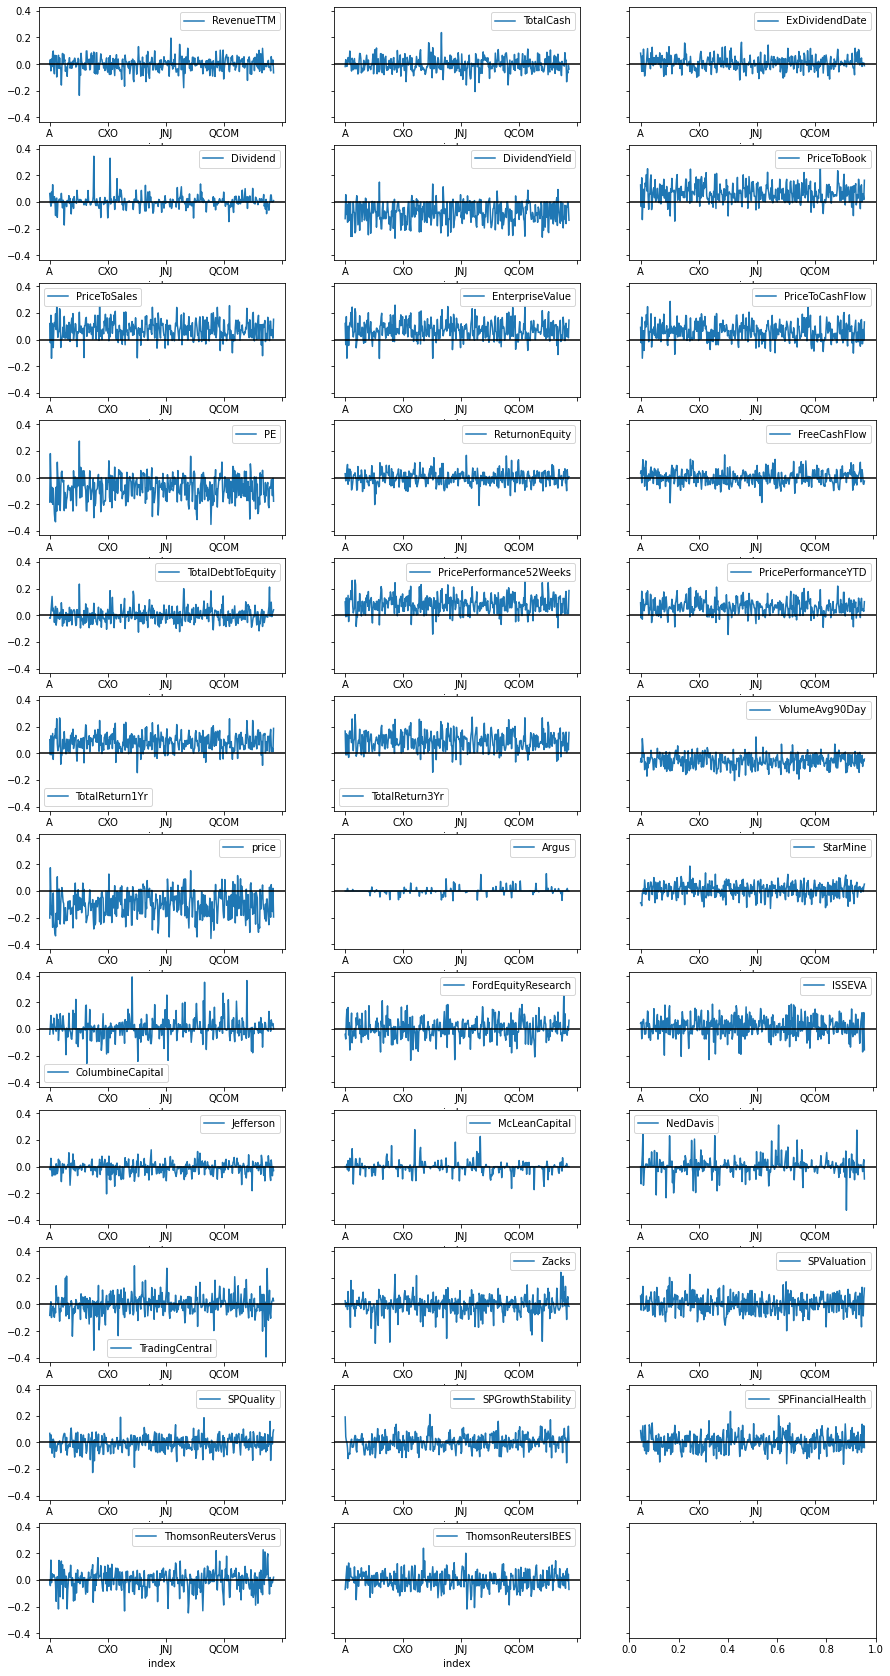

In [23]:
corr_df_transposed = corr_df.transpose()
# 35 columns
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_transposed.columns):
    corr_df_transposed.reset_index().plot(
        'index', col, ax=axes[num])
    axes[num].axhline(0, c='black')


In [25]:
fig.savefig('./bin/price_correlation_difference_one_day.png')

### Difference correlation to price 2 days ahead
> Above we plotted the correlation difference of a symbol to one day ahead,  now we will shift price back two days rather than one and plot that map

In [27]:
def get_correlation_price_shift(df, sym, price_shift):
    df = split_df_sym_col(df, sym).diff().copy()
    correlation_totals = {}
    for col in df.columns:
        _df = df.copy()
        if col == f'{sym}_price':  # for correlation of price tomorrow with itself today
            _df = split_df_sym_col(df, sym, ['price']).copy()
            _df2 = _df.copy().rename({col: 'price_diff_before'}, axis=1)
            _df = pd.concat([_df, _df2.shift(price_shift)], axis=1)
            correlation_totals[col.split('_')[1]] = _df.corr()['price_diff_before'].drop('price_diff_before').sum()
        else:
            _df = split_df_sym_col(df, sym, [col.split('_')[1], 'price']).copy()
            _df[f'{sym}_price'] = _df[f'{sym}_price'].shift(price_shift)
            correlation_totals[col.split('_')[1]] = _df.corr()[col].drop(col).sum()
    return correlation_totals.copy()

In [28]:
start_time = time.time()

correlation_all_two = {}
for sym in all_symbols:
    correlation_all_two[sym] = get_correlation_price_shift(model_df, sym, -2)

print("time taken:", round((time.time() - start_time), 2), 'seconds')

time taken: 20.82 seconds


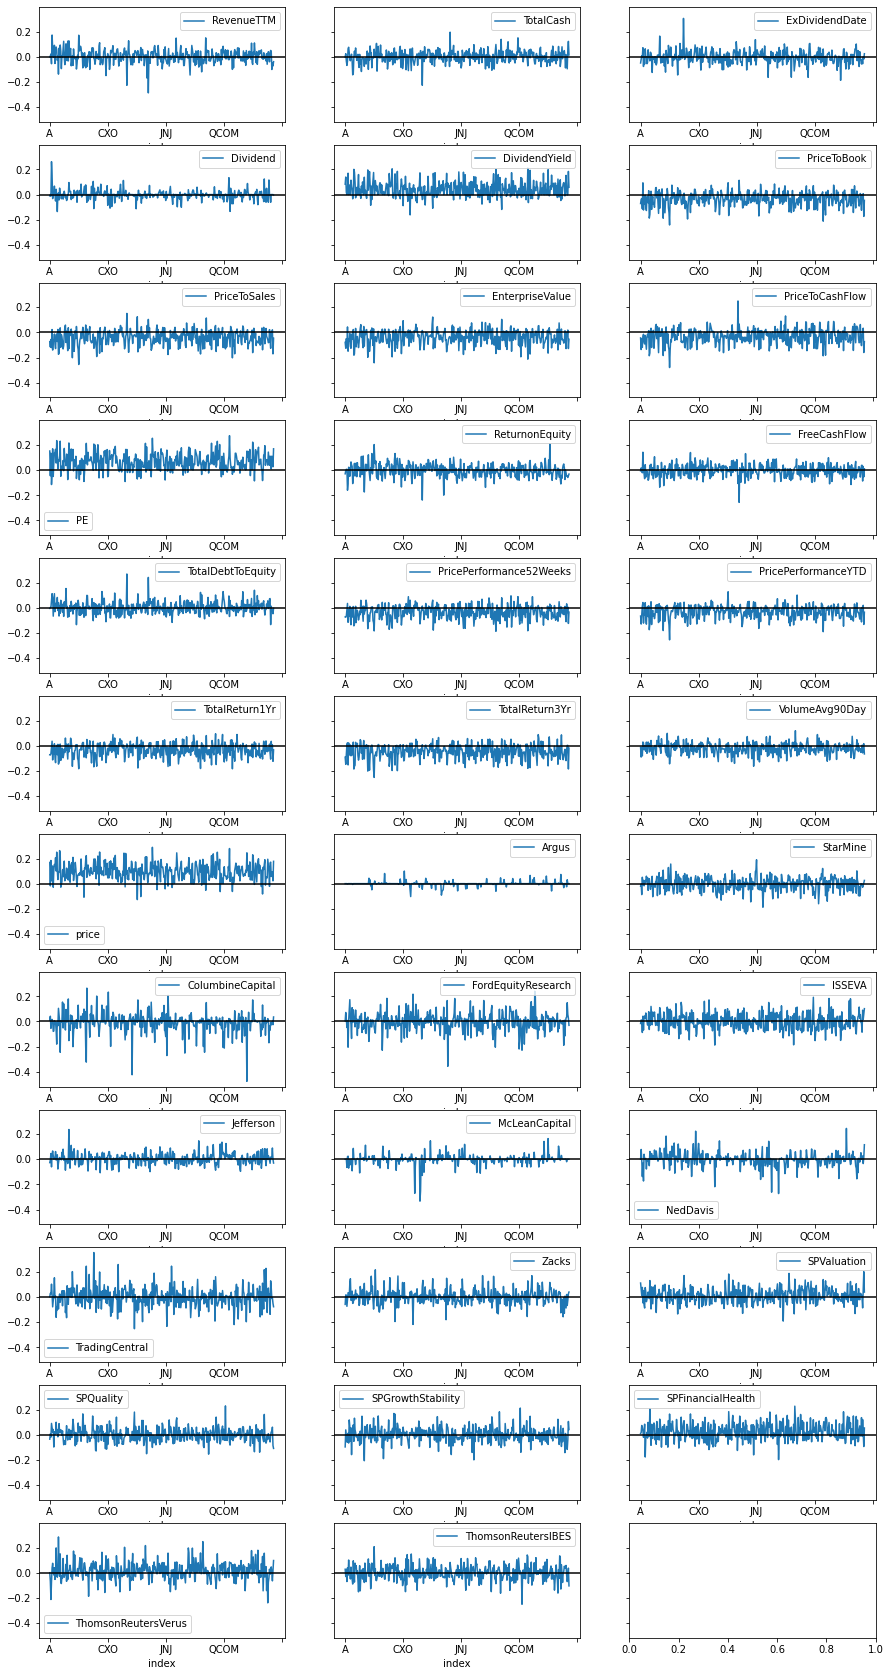

In [29]:
corr_df_two = pd.DataFrame(correlation_all_two)
corr_df_two_transposed = corr_df_two.transpose()
# 35 columns
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_two_transposed.columns):
    corr_df_two_transposed.reset_index().plot(
        'index', col, ax=axes[num])
    axes[num].axhline(0, c='black')

In [30]:
fig.savefig('./bin/price_correlation_difference_two_day.png')

### Let's look at one day difference of the columns we are dropping vs not dropping

In [31]:
drop_cols = ["ReturnonEquity", "ThomsonReutersVerus", "TotalCash", "SPFinancialHealth", "ISSEVA", "SPValuation", "SPGrowthStability", "SPQuality", "ExDividendDate", "Zacks", "NedDavis", "Dividend", "Argus", "Jefferson", "McLeanCapital", "StarMine", "TradingCentral", "TotalDebtToEquity", "ColumbineCapital", "ThomsonReutersIBES"]

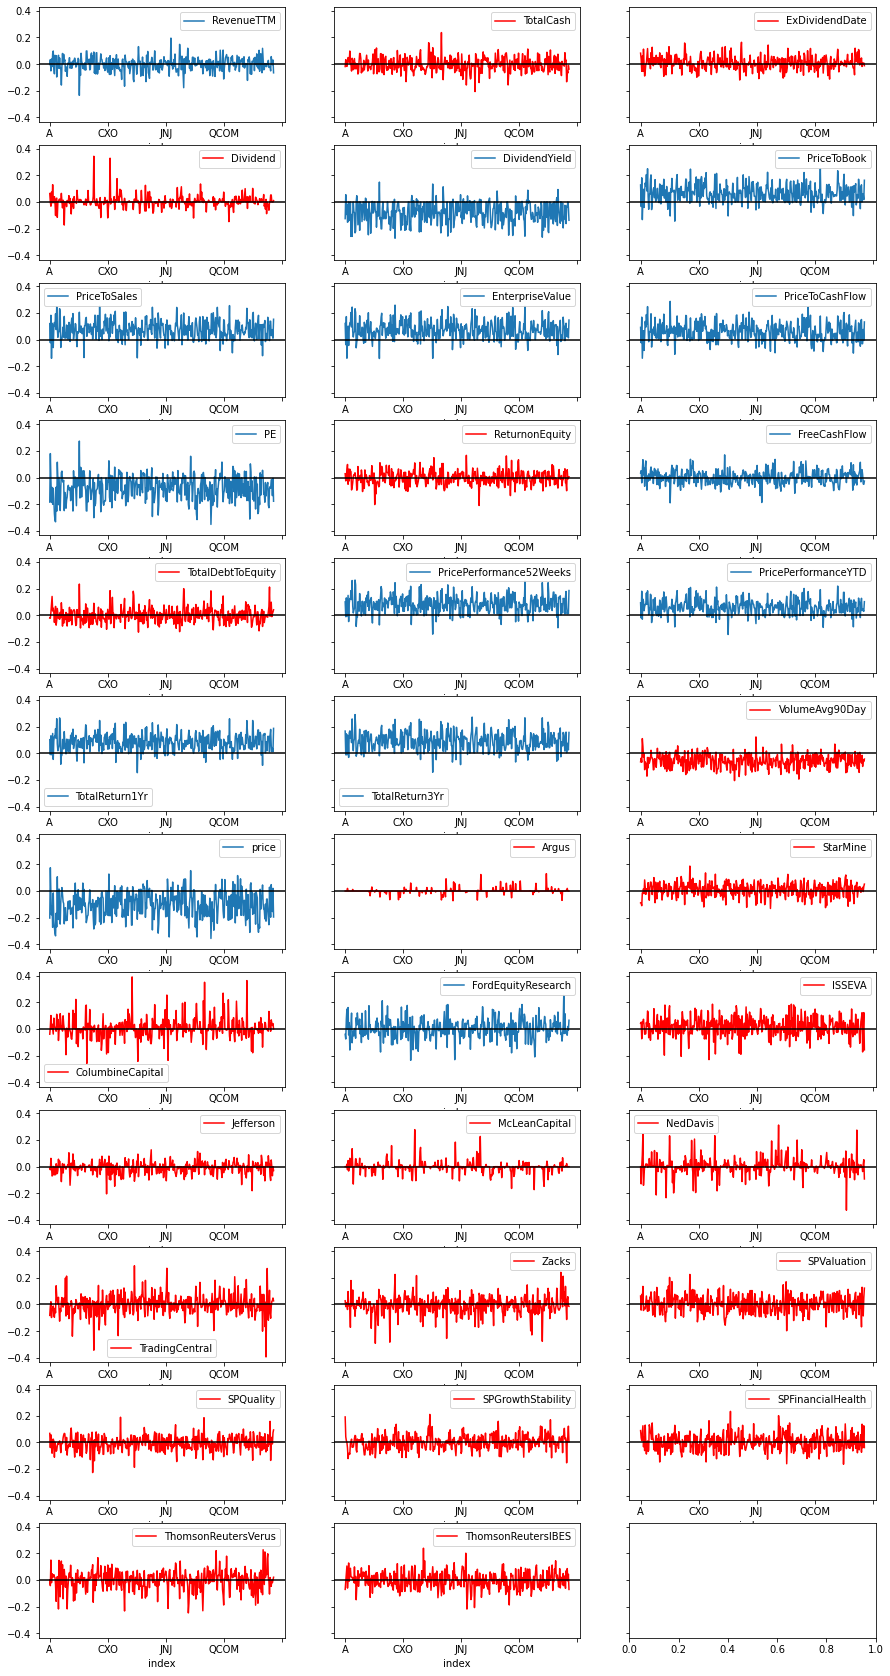

In [32]:
fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(15, 30), sharey=True)
axes = axes.flatten()

for num, col in enumerate(corr_df_transposed.columns):
    if col in drop_cols:
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num], c='red')
        axes[num].axhline(0, c='black')
    else:
        corr_df_transposed.reset_index().plot(
            'index', col, ax=axes[num])
        axes[num].axhline(0, c='black')

In [34]:
fig.savefig("./bin/highlight_bad_columns.png")

> In red you can see the columns that are going to be dropped.  They are more normally distributed, thus not useful in predicting what tomorrow's price is going to be

In [36]:
##### Saving more information

In [40]:
corr_df_two.to_csv("./bin/correlation_by_symbol_col_to_price_two_day.csv")

## (Base Model) all stocks after dropping columns

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers


os.chdir('..')
model_df = pd.read_pickle("./data/modeling/model_df.pkl")
model_df

Using TensorFlow backend.


A_RevenueTTM  A_TotalCash  A_ExDividendDate  A_Dividend  \
date                                                                  
2019-08-09        5019.0       2155.0                 0       0.164   
2019-08-12        5019.0       2155.0                 0       0.164   
2019-08-13        5019.0       2155.0                 0       0.164   
2019-08-14        5019.0       2155.0                 0       0.164   
2019-08-15        5090.0       1765.0                 0       0.164   
...                  ...          ...               ...         ...   
2020-12-07        5339.0       1441.0             18631       0.194   
2020-12-08        5339.0       1441.0             18631       0.194   
2020-12-09        5339.0       1441.0             18631       0.194   
2020-12-10        5339.0       1441.0             18631       0.194   
2020-12-11        5339.0       1441.0             18631       0.194   

            A_DividendYield  A_PriceToBook  A_PriceToSales  A_EnterpriseValue  \
date                                                                            
2019-08-09          0.94402        4.29809         4.40182       2.167070e+10   
2019-08-12          0.95571        4.24551         4.34797       2.140126e+10   
2019-08-13          0.98454        4.12119         4.22065       2.076411e+10   
2019-08-14          0.96984        4.18366         4.28463       2.108427e+10   
2019-08-15          1.00015        4.28332         4.06782       2.036590e+10   
...                     ...            ...             ...                ...   
2020-12-07          0.67390        7.23084         6.64825       3.615390e+10   
2020-12-08          0.67832        7.18375         6.60495       3.592440e+10   
2020-12-09          0.66319        7.34764         6.75563       3.672306e+10   
2020-12-10          0.66667        7.30934         6.72042       3.653640e+10   
2020-12-11          0.65314        7.46067         6.85956       3.727386e+10   

            A_PriceToCashFlow  A_PE  ...  ZTS_McLeanCapital  ZTS_NedDavis  \
date                                 ...                                    
2019-08-09           16.57368  19.8  ...                3.0           3.0   
2019-08-12           16.37095  19.2  ...                3.0           3.0   
2019-08-13           15.89156  19.5  ...                3.0           3.0   
2019-08-14           16.13245  18.9  ...                3.0           3.0   
2019-08-15           16.05056  20.8  ...                3.0           3.0   
...                       ...   ...  ...                ...           ...   
2020-12-07           34.56182  49.7  ...                3.0           3.0   
2020-12-08           34.33671  50.9  ...                3.0           3.0   
2020-12-09           35.12009  50.6  ...                3.0           3.0   
2020-12-10           34.93700  51.7  ...                3.0           3.0   
2020-12-11           35.66036  51.5  ...                3.0           3.0   

            ZTS_TradingCentral  ZTS_Zacks  ZTS_SPValuation  ZTS_SPQuality  \
date                                                                        
2019-08-09                   1          3             88.0           87.0   
2019-08-12                   1          3             88.0           87.0   
2019-08-13                   1          5             88.0           87.0   
2019-08-14                   1          5             88.0           87.0   
2019-08-15                   1          5             88.0           87.0   
...                        ...        ...              ...            ...   
2020-12-07                   3          3             86.0           87.0   
2020-12-08                   3          3             86.0           87.0   
2020-12-09                   3          3             86.0           88.0   
2020-12-10                   3          3             86.0           88.0   
2020-12-11                   3          3             86.0           87.0   

            ZTS_SPGrowthStabil

In [2]:
all_columns = model_df.columns
symbols = [col.split('_')[0] for col in all_columns if 'price' in col]
len(symbols)

387

In [3]:
drop_cols = ["ReturnonEquity", "ThomsonReutersVerus", "TotalCash", "SPFinancialHealth", "ISSEVA", "SPValuation", "SPGrowthStability", "SPQuality", "ExDividendDate", "Zacks", "NedDavis", "Dividend", "Argus", "Jefferson", "McLeanCapital", "StarMine", "TradingCentral", "TotalDebtToEquity", "ColumbineCapital", "ThomsonReutersIBES"]

drop_cols_all = []
for col in all_columns:
    if col.split('_')[1] in drop_cols:
        drop_cols_all.append(col)

# Check to make sure it is dropping the correct amount of columns
assert(len(drop_cols_all) == (len(drop_cols) * len(symbols)))

In [4]:
print("Shape before:", model_df.shape)
model_df.drop(drop_cols_all, axis=1, inplace=True)
print("Shape after:", model_df.shape)

Shape before: (347, 13545)
Shape after: (347, 5805)


In [6]:
model_df.to_pickle("./data/modeling/model_df_cols_dropped.pkl")

### Checkpoint

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, LSTM, LeakyReLU
from keras import backend as K
from sklearn.metrics import r2_score
from tensorflow.keras.layers import GaussianNoise
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras import initializers



os.chdir('..')
model_df = pd.read_pickle("./data/modeling/model_df_cols_dropped.pkl")

Using TensorFlow backend.


In [30]:
n_input = 1

df = model_df.copy()

n_features = df.shape[1]

val_days = 3

# Split
df_train = df[:-val_days]
df_val = df[-val_days:]

# Scale
scaler = MinMaxScaler()
df_train_scaled = scaler.fit_transform(df_train)
df_val_scaled = scaler.transform(df_val)

sufferage = 2

batch_size = round(n_features/sufferage)

ts_train = TimeseriesGenerator(df_train_scaled, df_train_scaled, length=n_input, batch_size=batch_size)
ts_val = TimeseriesGenerator(df_val_scaled, df_val_scaled, length=n_input, batch_size=batch_size)

X, y = ts_train[0]
#display(X, y)

try:
    del model
    K.clear_session()
    print('deleted')
except NameError:
    pass

model = Sequential()

#  LSTM neurons should be divisible by n_days
                                # input_shape is (n_days, X_n_features)
n_features = df.shape[1]
activation = 'relu'
n_hidden_layers = 8
model.add(LSTM(batch_size, activation=activation, input_shape=(n_input, n_features),
               return_sequences=True))
               #kernel_initializer=initializers.RandomNormal(.5)))
model.add(LSTM(64, activation=activation))
model.add(Dense(64, activation='relu'))
# for i in range(n_hidden_layers):
#     #model.add(Dense(batch_size, activation='relu'))
#     model.add(LeakyReLU(batch_size/(i+1)))
#     model.add(Dropout(.01))

# model.add(Dense(2048, activation='relu'))
# model.add(Dense(1024, activation='relu'))

#model.add(Dense(n_input*3, activation='relu'))
model.add(GaussianNoise(1))

#             output_shape is n_target_features
model.add(Dense(n_features, activation=activation,
                kernel_regularizer=l2(5)))
model.compile(loss='mse', optimizer='adam')
check_point_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./data/models/best_analyst', monitor='loss', verbose=1, save_best_only=True, save_weights_only=True
)
model.fit(ts_train, epochs=300, verbose=1, batch_size=batch_size, workers=0)#, callbacks=[check_point_callback])

pd.DataFrame(model.predict(ts_train), columns=df.columns).iloc[0].value_counts()

=======] - 0s 29ms/step - loss: 2.0336
Epoch 54/300
1/1 [==============================] - 0s 27ms/step - loss: 1.8922
Epoch 55/300
1/1 [==============================] - 0s 28ms/step - loss: 1.7521
Epoch 56/300
1/1 [==============================] - 0s 28ms/step - loss: 1.6137
Epoch 57/300
1/1 [==============================] - 0s 28ms/step - loss: 1.4774
Epoch 58/300
1/1 [==============================] - 0s 27ms/step - loss: 1.3462
Epoch 59/300
1/1 [==============================] - 0s 29ms/step - loss: 1.2219
Epoch 60/300
1/1 [==============================] - 0s 28ms/step - loss: 1.1033
Epoch 61/300
1/1 [==============================] - 0s 27ms/step - loss: 0.9921
Epoch 62/300
1/1 [==============================] - 0s 28ms/step - loss: 0.8883
Epoch 63/300
1/1 [==============================] - 0s 28ms/step - loss: 0.7925
Epoch 64/300
1/1 [==============================] - 0s 27ms/step - loss: 0.7055
Epoch 65/300
1/1 [==============================] - 0s 28ms/step - loss: 0.6262
E

0.000000    349
0.679529      2
0.302078      1
0.244786      1
0.754563      1
           ... 
0.598426      1
0.674424      1
0.231766      1
0.739566      1
0.527299      1
Name: 0, Length: 5456, dtype: int64

In [31]:
df_pred = pd.DataFrame(scaler.inverse_transform(model.predict(ts_train)), columns=df.columns, index=df_train[1:].index)
df_pred.iloc[0].value_counts()

 0.000000e+00    89
 3.000000e+00    15
 1.000000e+00     5
 2.000000e+00     4
 5.500000e+00     2
                 ..
 1.686638e+10     1
-6.730782e+00     1
 2.040189e+00     1
 6.890545e+03     1
 1.046875e+00     1
Name: 2019-08-12 00:00:00, Length: 5695, dtype: int64

Text(0.5, 0, 'Price difference')

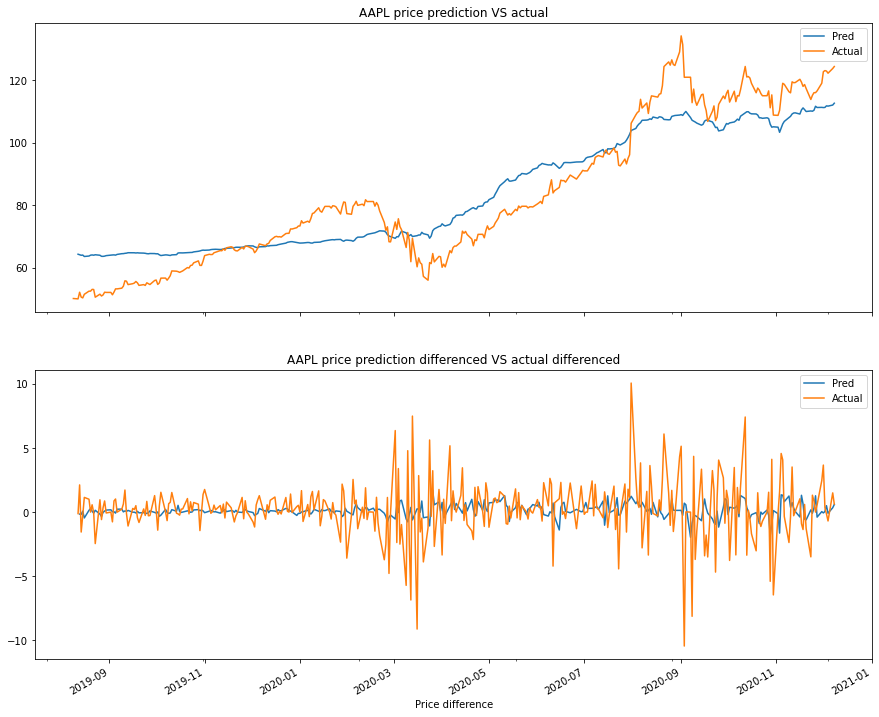

In [32]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(15, 13), sharex=True)
ax1.set_title("AAPL price prediction VS actual")
df_pred['AAPL_price'].plot(ax=ax1)
df_train['AAPL_price'].plot(ax=ax1)
ax1.legend(labels=['Pred', 'Actual'])
ax1.set_xlabel("Price")


ax2.set_title("AAPL price prediction differenced VS actual differenced")
df_pred['AAPL_price'].diff().plot(ax=ax2)
df_train['AAPL_price'].diff().plot(ax=ax2)
ax2.legend(labels=['Pred', 'Actual'])
ax2.set_xlabel("Price difference")



In [33]:
pred_idx = df_train.iloc[[-1]].index.union(df_val.index)

val_start_test = list(df_train.iloc[-1].values.reshape(1, n_features))
preds = [df_train.iloc[-1].values]
z = 0
for i in val_start_test:
    z += 1
    pred = model.predict(i.reshape(1, 1, n_features))
    val_start_test.append(pred)
    preds.append(pred.reshape(n_features))
    if z == val_days:
        break
val_preds = pd.DataFrame(preds, columns=df_val.columns, index=pred_idx)

In [34]:
price_cols = [col for col in val_preds.columns if 'price' in col]

In [35]:
df_val.shape

(3, 5805)

In [36]:
df_score = df.loc[pred_idx]

In [37]:
r2_scores = {}
for col in price_cols:
    score = r2_score(df_score[col], val_preds[col])
    r2_scores[col.split('_')[0]] = score
pd.Series(r2_scores).sort_values(ascending=False).head(20)

HFC    -1.938407e+03
GPS    -2.631771e+03
CNP    -3.737920e+03
ZION   -5.650671e+03
SPGI   -6.668782e+03
USB    -8.590121e+03
NOV    -8.866606e+03
WU     -1.011154e+04
DAL    -1.215574e+04
NTAP   -1.225729e+04
MO     -1.321069e+04
APTV   -2.191248e+04
PKG    -3.577076e+04
CMA    -3.915138e+04
WBA    -4.505698e+04
MOS    -6.044251e+04
CL     -1.086976e+05
AMZN   -2.831034e+16
IDXX   -1.554507e+17
RL     -1.809297e+17
dtype: float64

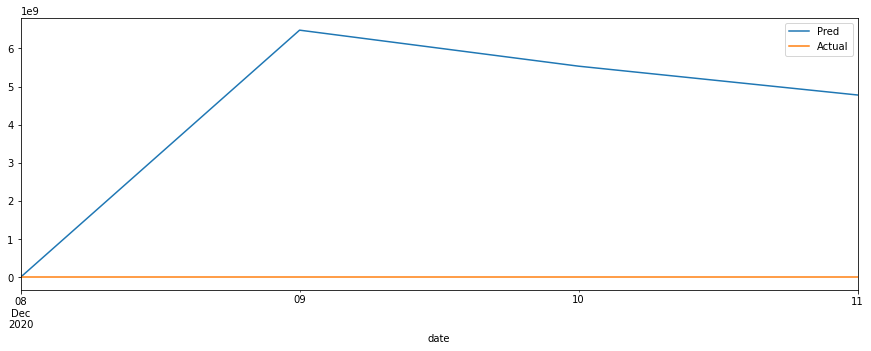

In [38]:
sym = 'AAPL'

fig, ax = plt.subplots(figsize=(15, 5))
val_preds[f'{sym}_price'].plot(ax=ax)
df_score[f'{sym}_price'].plot(ax=ax)
plt.legend(labels=['Pred', 'Actual'])

In [22]:
df_score[f'{sym}_price']

date
2020-12-08    115.43
2020-12-09    115.22
2020-12-10    112.59
2020-12-11    111.04
Freq: D, Name: IFF_price, dtype: float64